In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from keras import backend as K
np.random.seed(0)

Using TensorFlow backend.


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

def create_testdata(dataset, look_back = 1):
    dataX, dataY = [], []
    a = dataset[0:look_back, 0]
    dataX.append(a)
    dataY.append(dataset[look_back, 0])
    return np.array(dataX), np.array(dataY)


In [2]:
df = pd.read_csv("sp500.csv")
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['caldt'] =  df['caldt'].dt.strftime('%Y-%m-%d')
data = df['spindx'].values
data = data.astype('float32')
data = np.reshape(data,(-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
pred = [] # at the end, append to prediction
testVal = []
num_hidden = 64
# Look back is how many lags do we want. so look back 1 in seq = (1 2 3 4 5) will produce (2 3 4 5 6)
df.head()

,caldt,vwretd,spindx,sprtrn
0,2009-06-01,0.025957,942.87,0.025818
1,2009-06-02,0.001893,944.74,0.001983
2,2009-06-03,-0.013036,931.76,-0.013739
3,2009-06-04,0.011331,942.46,0.011484
4,2009-06-05,-0.002298,940.09,-0.002515


In [0]:
epochs = 7
look_back=5
start = time.time()
for i in range(10,len(data)-look_back):
    #print(i)
    np.random.seed(0)
    train, test = data[0:i,:], data[i:i+look_back+1,]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_testdata(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    model = Sequential()
    model.add(LSTM(num_hidden,input_shape = (look_back, 1)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(trainX, trainY, epochs = epochs, batch_size = 2, verbose = 1)
    testPredict = model.predict(testX)
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    pred.append(testPredict)
    testVal.append(testY)
    K.clear_session()
    if (i - 10) % 50 == 0:
      print('Saving pred so far...')
      np.save('pred_multi3', np.asarray(pred))
end = time.time()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/7
4/4 [==============================] - 0s 103ms/step - loss: 7.1783e-04
Epoch 2/7
4/4 [==============================] - 0s 4ms/step - loss: 1.3304e-04
Epoch 3/7
4/4 [==============================] - 0s 5ms/step - loss: 4.8472e-05
Epoch 4/7
4/4 [==============================] - 0s 5ms/step - loss: 1.9549e-04
Epoch 5/7
4/4 [==============================] - 0s 5ms/step - loss: 1.9039e-04
Epoch 6/7
4/4 [==============================] - 0s 5ms/step - loss: 8.0174e-05
Epoch 7/7
4/4 [==============================] - 0s 9ms/step - loss: 1.1605e-05
Saving pred so far...
Epoch 1/7
5/5 [==============================] - 0s 79ms/step - loss: 5.8157e-04
Epoch 2/7
5/5 [==============================] - 0s 4ms/step - loss: 2.6034e-05
Epoch 3/7
5/5 [==============================] - 0s 7ms/step - loss: 1.8898e-04
Epoch 4/7
5/5 [==============================] - 0s 6ms/step - loss: 8.6942e-05
Epoch 5/7
5/5

31/31 [==============================] - 0s 4ms/step - loss: 1.3391e-04
Epoch 5/7
31/31 [==============================] - 0s 2ms/step - loss: 1.2834e-04
Epoch 6/7
31/31 [==============================] - 0s 2ms/step - loss: 8.0278e-05
Epoch 7/7
31/31 [==============================] - 0s 3ms/step - loss: 7.4540e-05
Epoch 1/7
32/32 [==============================] - 1s 18ms/step - loss: 1.6430e-04
Epoch 2/7
32/32 [==============================] - 0s 2ms/step - loss: 1.1001e-04
Epoch 3/7
32/32 [==============================] - 0s 2ms/step - loss: 1.0414e-04
Epoch 4/7
32/32 [==============================] - 0s 2ms/step - loss: 8.5113e-05
Epoch 5/7
32/32 [==============================] - 0s 2ms/step - loss: 8.9446e-05
Epoch 6/7
32/32 [==============================] - 0s 2ms/step - loss: 8.1530e-05
Epoch 7/7
32/32 [==============================] - 0s 2ms/step - loss: 7.3489e-05
Epoch 1/7
33/33 [==============================] - 1s 17ms/step - loss: 1.9656e-04
Epoch 2/7
33/33 [=======

59/59 [==============================] - 0s 2ms/step - loss: 9.5102e-05
Epoch 7/7
59/59 [==============================] - 0s 2ms/step - loss: 6.9353e-05
Epoch 1/7
60/60 [==============================] - 0s 8ms/step - loss: 7.0479e-04
Epoch 2/7
60/60 [==============================] - 0s 2ms/step - loss: 2.7792e-04
Epoch 3/7
60/60 [==============================] - 0s 2ms/step - loss: 1.8643e-04
Epoch 4/7
60/60 [==============================] - 0s 3ms/step - loss: 1.0613e-04
Epoch 5/7
60/60 [==============================] - 0s 2ms/step - loss: 9.0047e-05
Epoch 6/7
60/60 [==============================] - 0s 2ms/step - loss: 7.5321e-05
Epoch 7/7
60/60 [==============================] - 0s 2ms/step - loss: 6.5655e-05
Epoch 1/7
61/61 [==============================] - 1s 9ms/step - loss: 6.5318e-04
Epoch 2/7
61/61 [==============================] - 0s 2ms/step - loss: 2.9635e-04
Epoch 3/7
61/61 [==============================] - 0s 2ms/step - loss: 1.7044e-04
Epoch 4/7
61/61 [=========

74/74 [==============================] - 0s 7ms/step - loss: 8.2054e-04
Epoch 2/7
74/74 [==============================] - 0s 2ms/step - loss: 3.1473e-04
Epoch 3/7
74/74 [==============================] - 0s 2ms/step - loss: 1.7350e-04
Epoch 4/7
74/74 [==============================] - 0s 2ms/step - loss: 1.1255e-04
Epoch 5/7
74/74 [==============================] - 0s 3ms/step - loss: 8.7168e-05
Epoch 6/7
74/74 [==============================] - 0s 2ms/step - loss: 9.4170e-05
Epoch 7/7
74/74 [==============================] - 0s 2ms/step - loss: 7.8884e-05
Epoch 1/7
75/75 [==============================] - 1s 7ms/step - loss: 7.8592e-04
Epoch 2/7
75/75 [==============================] - 0s 3ms/step - loss: 2.9717e-04
Epoch 3/7
75/75 [==============================] - 0s 2ms/step - loss: 1.6188e-04
Epoch 4/7
75/75 [==============================] - 0s 2ms/step - loss: 7.7685e-05
Epoch 5/7
75/75 [==============================] - 0s 2ms/step - loss: 8.0170e-05
Epoch 6/7
75/75 [=========

88/88 [==============================] - 0s 3ms/step - loss: 9.4161e-05
Epoch 4/7
88/88 [==============================] - 0s 2ms/step - loss: 9.3871e-05
Epoch 5/7
88/88 [==============================] - 0s 2ms/step - loss: 6.9301e-05
Epoch 6/7
88/88 [==============================] - 0s 2ms/step - loss: 7.8117e-05
Epoch 7/7
88/88 [==============================] - 0s 2ms/step - loss: 8.8918e-05
Epoch 1/7
89/89 [==============================] - 1s 6ms/step - loss: 8.1441e-04
Epoch 2/7
89/89 [==============================] - 0s 2ms/step - loss: 2.5903e-04
Epoch 3/7
89/89 [==============================] - 0s 3ms/step - loss: 1.2596e-04
Epoch 4/7
89/89 [==============================] - 0s 2ms/step - loss: 9.3554e-05
Epoch 5/7
89/89 [==============================] - 0s 2ms/step - loss: 8.6164e-05
Epoch 6/7
89/89 [==============================] - 0s 2ms/step - loss: 1.0823e-04
Epoch 7/7
89/89 [==============================] - 0s 2ms/step - loss: 9.2544e-05
Epoch 1/7
90/90 [=========

116/116 [==============================] - 0s 2ms/step - loss: 9.9661e-05
Epoch 4/7
116/116 [==============================] - 0s 2ms/step - loss: 8.0300e-05
Epoch 5/7
116/116 [==============================] - 0s 2ms/step - loss: 9.1116e-05
Epoch 6/7
116/116 [==============================] - 0s 2ms/step - loss: 7.9119e-05
Epoch 7/7
116/116 [==============================] - 0s 2ms/step - loss: 9.6266e-05
Epoch 1/7
117/117 [==============================] - 1s 5ms/step - loss: 8.5329e-04
Epoch 2/7
117/117 [==============================] - 0s 2ms/step - loss: 2.0474e-04
Epoch 3/7
117/117 [==============================] - 0s 2ms/step - loss: 1.1348e-04
Epoch 4/7
117/117 [==============================] - 0s 2ms/step - loss: 7.7128e-05
Epoch 5/7
117/117 [==============================] - 0s 2ms/step - loss: 7.2997e-05
Epoch 6/7
117/117 [==============================] - 0s 2ms/step - loss: 8.0064e-05
Epoch 7/7
117/117 [==============================] - 0s 2ms/step - loss: 6.7371e-05
Ep

144/144 [==============================] - 1s 4ms/step - loss: 8.1232e-04
Epoch 2/7
144/144 [==============================] - 0s 2ms/step - loss: 1.3653e-04
Epoch 3/7
144/144 [==============================] - 0s 2ms/step - loss: 7.8606e-05
Epoch 4/7
144/144 [==============================] - 0s 2ms/step - loss: 6.5594e-05
Epoch 5/7
144/144 [==============================] - 0s 2ms/step - loss: 6.9555e-05
Epoch 6/7
144/144 [==============================] - 0s 2ms/step - loss: 8.2750e-05
Epoch 7/7
144/144 [==============================] - 0s 2ms/step - loss: 7.2883e-05
Epoch 1/7
145/145 [==============================] - 1s 4ms/step - loss: 7.6632e-04
Epoch 2/7
145/145 [==============================] - 0s 2ms/step - loss: 1.6666e-04
Epoch 3/7
145/145 [==============================] - 0s 2ms/step - loss: 7.9855e-05
Epoch 4/7
145/145 [==============================] - 0s 2ms/step - loss: 6.0372e-05
Epoch 5/7
145/145 [==============================] - 0s 2ms/step - loss: 5.9549e-05
Ep

171/171 [==============================] - 0s 2ms/step - loss: 6.3143e-05
Epoch 7/7
171/171 [==============================] - 0s 2ms/step - loss: 7.0378e-05
Epoch 1/7
172/172 [==============================] - 1s 4ms/step - loss: 8.3541e-04
Epoch 2/7
172/172 [==============================] - 0s 2ms/step - loss: 1.1746e-04
Epoch 3/7
172/172 [==============================] - 0s 2ms/step - loss: 8.7366e-05
Epoch 4/7
172/172 [==============================] - 0s 2ms/step - loss: 7.4159e-05
Epoch 5/7
172/172 [==============================] - 0s 2ms/step - loss: 7.0360e-05
Epoch 6/7
172/172 [==============================] - 0s 2ms/step - loss: 6.4747e-05
Epoch 7/7
172/172 [==============================] - 0s 2ms/step - loss: 7.0783e-05
Epoch 1/7
173/173 [==============================] - 1s 4ms/step - loss: 9.4409e-04
Epoch 2/7
173/173 [==============================] - 0s 2ms/step - loss: 1.1580e-04
Epoch 3/7
173/173 [==============================] - 0s 2ms/step - loss: 8.0608e-05
Ep

199/199 [==============================] - 0s 2ms/step - loss: 7.3384e-05
Epoch 5/7
199/199 [==============================] - 0s 2ms/step - loss: 7.2369e-05
Epoch 6/7
199/199 [==============================] - 0s 2ms/step - loss: 6.7222e-05
Epoch 7/7
199/199 [==============================] - 0s 2ms/step - loss: 6.3023e-05
Epoch 1/7
200/200 [==============================] - 1s 4ms/step - loss: 9.1191e-04
Epoch 2/7
200/200 [==============================] - 0s 2ms/step - loss: 9.5786e-05
Epoch 3/7
200/200 [==============================] - 0s 2ms/step - loss: 7.0669e-05
Epoch 4/7
200/200 [==============================] - 0s 2ms/step - loss: 7.0725e-05
Epoch 5/7
200/200 [==============================] - 0s 2ms/step - loss: 6.0783e-05
Epoch 6/7
200/200 [==============================] - 0s 2ms/step - loss: 6.1977e-05
Epoch 7/7
200/200 [==============================] - 0s 2ms/step - loss: 6.6803e-05
Epoch 1/7
201/201 [==============================] - 1s 4ms/step - loss: 9.5069e-04
Ep

Epoch 3/7
227/227 [==============================] - 0s 2ms/step - loss: 6.1285e-05
Epoch 4/7
227/227 [==============================] - 0s 2ms/step - loss: 6.5701e-05
Epoch 5/7
227/227 [==============================] - 0s 2ms/step - loss: 6.4307e-05
Epoch 6/7
227/227 [==============================] - 0s 2ms/step - loss: 6.6606e-05
Epoch 7/7
227/227 [==============================] - 0s 2ms/step - loss: 6.9739e-05
Epoch 1/7
228/228 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 2/7
228/228 [==============================] - 0s 2ms/step - loss: 9.1677e-05
Epoch 3/7
228/228 [==============================] - 0s 2ms/step - loss: 6.6131e-05
Epoch 4/7
228/228 [==============================] - 0s 2ms/step - loss: 6.9378e-05
Epoch 5/7
228/228 [==============================] - 0s 2ms/step - loss: 6.5206e-05
Epoch 6/7
228/228 [==============================] - 0s 2ms/step - loss: 6.1767e-05
Epoch 7/7
228/228 [==============================] - 0s 2ms/step - loss: 6.1840e

255/255 [==============================] - 1s 4ms/step - loss: 8.1994e-04
Epoch 2/7
255/255 [==============================] - 1s 2ms/step - loss: 9.5441e-05
Epoch 3/7
255/255 [==============================] - 1s 2ms/step - loss: 8.8345e-05
Epoch 4/7
255/255 [==============================] - 1s 2ms/step - loss: 7.9009e-05
Epoch 5/7
255/255 [==============================] - 0s 2ms/step - loss: 8.2312e-05
Epoch 6/7
255/255 [==============================] - 0s 2ms/step - loss: 7.5534e-05
Epoch 7/7
255/255 [==============================] - 0s 2ms/step - loss: 6.9130e-05
Epoch 1/7
256/256 [==============================] - 1s 3ms/step - loss: 8.3982e-04
Epoch 2/7
256/256 [==============================] - 0s 2ms/step - loss: 9.3424e-05
Epoch 3/7
256/256 [==============================] - 0s 2ms/step - loss: 7.9311e-05
Epoch 4/7
256/256 [==============================] - 0s 2ms/step - loss: 8.9201e-05
Epoch 5/7
256/256 [==============================] - 0s 2ms/step - loss: 8.3026e-05
Ep

282/282 [==============================] - 1s 2ms/step - loss: 9.0202e-05
Epoch 7/7
282/282 [==============================] - 1s 2ms/step - loss: 7.3909e-05
Epoch 1/7
283/283 [==============================] - 1s 3ms/step - loss: 8.4446e-04
Epoch 2/7
283/283 [==============================] - 1s 2ms/step - loss: 1.0963e-04
Epoch 3/7
283/283 [==============================] - 1s 2ms/step - loss: 8.7224e-05
Epoch 4/7
283/283 [==============================] - 1s 2ms/step - loss: 9.1052e-05
Epoch 5/7
283/283 [==============================] - 1s 2ms/step - loss: 8.5264e-05
Epoch 6/7
283/283 [==============================] - 1s 2ms/step - loss: 8.2785e-05
Epoch 7/7
283/283 [==============================] - 1s 2ms/step - loss: 7.2749e-05
Epoch 1/7
284/284 [==============================] - 1s 3ms/step - loss: 8.9346e-04
Epoch 2/7
284/284 [==============================] - 1s 2ms/step - loss: 9.9612e-05
Epoch 3/7
284/284 [==============================] - 1s 2ms/step - loss: 8.6515e-05
Ep

Epoch 4/7
310/310 [==============================] - 1s 2ms/step - loss: 8.3074e-05
Epoch 5/7
310/310 [==============================] - 1s 2ms/step - loss: 8.2513e-05
Epoch 6/7
310/310 [==============================] - 1s 2ms/step - loss: 8.1134e-05
Epoch 7/7
310/310 [==============================] - 1s 2ms/step - loss: 7.4999e-05
Epoch 1/7
311/311 [==============================] - 1s 3ms/step - loss: 6.9442e-04
Epoch 2/7
311/311 [==============================] - 1s 2ms/step - loss: 9.6030e-05
Epoch 3/7
311/311 [==============================] - 1s 2ms/step - loss: 9.8871e-05
Epoch 4/7
311/311 [==============================] - 1s 2ms/step - loss: 8.6088e-05
Epoch 5/7
311/311 [==============================] - 1s 2ms/step - loss: 7.7913e-05
Epoch 6/7
311/311 [==============================] - 1s 2ms/step - loss: 8.7160e-05
Epoch 7/7
311/311 [==============================] - 1s 2ms/step - loss: 7.6625e-05
Epoch 1/7
312/312 [==============================] - 1s 3ms/step - loss: 7.0

338/338 [==============================] - 1s 2ms/step - loss: 8.6832e-05
Epoch 3/7
338/338 [==============================] - 1s 2ms/step - loss: 1.0770e-04
Epoch 4/7
338/338 [==============================] - 1s 2ms/step - loss: 9.2337e-05
Epoch 5/7
338/338 [==============================] - 1s 2ms/step - loss: 7.9344e-05
Epoch 6/7
338/338 [==============================] - 1s 2ms/step - loss: 8.4046e-05
Epoch 7/7
338/338 [==============================] - 1s 2ms/step - loss: 7.4374e-05
Epoch 1/7
339/339 [==============================] - 1s 3ms/step - loss: 7.0897e-04
Epoch 2/7
339/339 [==============================] - 1s 2ms/step - loss: 8.8964e-05
Epoch 3/7
339/339 [==============================] - 1s 2ms/step - loss: 9.4577e-05
Epoch 4/7
339/339 [==============================] - 1s 2ms/step - loss: 8.5813e-05
Epoch 5/7
339/339 [==============================] - 1s 2ms/step - loss: 8.3190e-05
Epoch 6/7
339/339 [==============================] - 1s 2ms/step - loss: 7.8714e-05
Ep

365/365 [==============================] - 1s 2ms/step - loss: 7.4474e-05
Epoch 7/7
365/365 [==============================] - 1s 2ms/step - loss: 7.2438e-05
Epoch 1/7
366/366 [==============================] - 1s 3ms/step - loss: 6.7592e-04
Epoch 2/7
366/366 [==============================] - 1s 2ms/step - loss: 8.3193e-05
Epoch 3/7
366/366 [==============================] - 1s 2ms/step - loss: 8.6227e-05
Epoch 4/7
366/366 [==============================] - 1s 2ms/step - loss: 8.2168e-05
Epoch 5/7
366/366 [==============================] - 1s 2ms/step - loss: 8.4558e-05
Epoch 6/7
366/366 [==============================] - 1s 2ms/step - loss: 7.2071e-05
Epoch 7/7
366/366 [==============================] - 1s 2ms/step - loss: 7.4214e-05
Epoch 1/7
367/367 [==============================] - 1s 3ms/step - loss: 7.7759e-04
Epoch 2/7
367/367 [==============================] - 1s 2ms/step - loss: 8.8776e-05
Epoch 3/7
367/367 [==============================] - 1s 2ms/step - loss: 7.7671e-05
Ep

393/393 [==============================] - 1s 2ms/step - loss: 8.6474e-05
Epoch 5/7
393/393 [==============================] - 1s 2ms/step - loss: 7.9635e-05
Epoch 6/7
393/393 [==============================] - 1s 2ms/step - loss: 7.6611e-05
Epoch 7/7
393/393 [==============================] - 1s 2ms/step - loss: 7.3294e-05
Epoch 1/7
394/394 [==============================] - 1s 3ms/step - loss: 7.8001e-04
Epoch 2/7
394/394 [==============================] - 1s 2ms/step - loss: 7.6742e-05
Epoch 3/7
394/394 [==============================] - 1s 2ms/step - loss: 8.6465e-05
Epoch 4/7
394/394 [==============================] - 1s 2ms/step - loss: 7.6029e-05
Epoch 5/7
394/394 [==============================] - 1s 3ms/step - loss: 7.4011e-05
Epoch 6/7
394/394 [==============================] - 1s 3ms/step - loss: 8.4737e-05
Epoch 7/7
394/394 [==============================] - 1s 4ms/step - loss: 7.1833e-05
Epoch 1/7
395/395 [==============================] - 3s 7ms/step - loss: 7.4752e-04
Ep

407/407 [==============================] - 1s 2ms/step - loss: 8.5889e-05
Epoch 4/7
407/407 [==============================] - 1s 2ms/step - loss: 8.2186e-05
Epoch 5/7
407/407 [==============================] - 1s 2ms/step - loss: 7.8539e-05
Epoch 6/7
407/407 [==============================] - 1s 2ms/step - loss: 8.2654e-05
Epoch 7/7
407/407 [==============================] - 1s 2ms/step - loss: 6.4533e-05
Epoch 1/7
408/408 [==============================] - 1s 3ms/step - loss: 7.1476e-04
Epoch 2/7
408/408 [==============================] - 1s 2ms/step - loss: 8.2888e-05
Epoch 3/7
408/408 [==============================] - 1s 2ms/step - loss: 7.2789e-05
Epoch 4/7
408/408 [==============================] - 1s 2ms/step - loss: 9.3817e-05
Epoch 5/7
408/408 [==============================] - 1s 2ms/step - loss: 6.9680e-05A: 0s - loss: 6.7866e
Epoch 6/7
408/408 [==============================] - 1s 2ms/step - loss: 7.3206e-05
Epoch 7/7
408/408 [==============================] - 1s 2ms/step 

435/435 [==============================] - 1s 3ms/step - loss: 7.6373e-04
Epoch 2/7
435/435 [==============================] - 1s 2ms/step - loss: 7.0672e-05
Epoch 3/7
435/435 [==============================] - 1s 2ms/step - loss: 7.6044e-05
Epoch 4/7
435/435 [==============================] - 1s 2ms/step - loss: 6.9729e-05
Epoch 5/7
435/435 [==============================] - 1s 2ms/step - loss: 6.8364e-05
Epoch 6/7
435/435 [==============================] - 1s 2ms/step - loss: 8.2454e-05
Epoch 7/7
435/435 [==============================] - 1s 2ms/step - loss: 7.5266e-05
Epoch 1/7
436/436 [==============================] - 1s 3ms/step - loss: 7.2815e-04
Epoch 2/7
436/436 [==============================] - 1s 2ms/step - loss: 9.0215e-05
Epoch 3/7
436/436 [==============================] - 1s 2ms/step - loss: 8.6660e-05
Epoch 4/7
436/436 [==============================] - 1s 2ms/step - loss: 7.3635e-05
Epoch 5/7
436/436 [==============================] - 1s 2ms/step - loss: 6.6451e-05
Ep

462/462 [==============================] - 1s 2ms/step - loss: 8.4693e-05
Epoch 6/7
462/462 [==============================] - 1s 2ms/step - loss: 7.4306e-05
Epoch 7/7
462/462 [==============================] - 1s 2ms/step - loss: 6.0437e-05
Epoch 1/7
463/463 [==============================] - 1s 3ms/step - loss: 8.5784e-04
Epoch 2/7
463/463 [==============================] - 1s 2ms/step - loss: 6.9555e-05
Epoch 3/7
463/463 [==============================] - 1s 2ms/step - loss: 8.6298e-05
Epoch 4/7
463/463 [==============================] - 1s 2ms/step - loss: 8.4847e-05
Epoch 5/7
463/463 [==============================] - 1s 2ms/step - loss: 7.5897e-05
Epoch 6/7
463/463 [==============================] - 1s 2ms/step - loss: 6.8220e-05
Epoch 7/7
463/463 [==============================] - 1s 2ms/step - loss: 7.2623e-05
Epoch 1/7
464/464 [==============================] - 1s 3ms/step - loss: 9.0480e-04
Epoch 2/7
464/464 [==============================] - 1s 2ms/step - loss: 7.0145e-05
Ep

490/490 [==============================] - 1s 2ms/step - loss: 7.0350e-05
Epoch 4/7
490/490 [==============================] - 1s 2ms/step - loss: 7.4928e-05
Epoch 5/7
490/490 [==============================] - 1s 2ms/step - loss: 6.6553e-05
Epoch 6/7
490/490 [==============================] - 1s 2ms/step - loss: 6.5314e-05
Epoch 7/7
490/490 [==============================] - 1s 2ms/step - loss: 5.8804e-05
Epoch 1/7
491/491 [==============================] - 1s 3ms/step - loss: 7.8311e-04
Epoch 2/7
491/491 [==============================] - 1s 2ms/step - loss: 7.5580e-05
Epoch 3/7
491/491 [==============================] - 1s 2ms/step - loss: 7.4961e-05
Epoch 4/7
491/491 [==============================] - 1s 2ms/step - loss: 7.3557e-05
Epoch 5/7
491/491 [==============================] - 1s 2ms/step - loss: 7.8431e-05
Epoch 6/7
491/491 [==============================] - 1s 2ms/step - loss: 6.7422e-05
Epoch 7/7
491/491 [==============================] - 1s 2ms/step - loss: 7.3111e-05
Ep

518/518 [==============================] - 1s 3ms/step - loss: 9.5561e-04
Epoch 2/7
518/518 [==============================] - 1s 2ms/step - loss: 8.1466e-05
Epoch 3/7
518/518 [==============================] - 1s 2ms/step - loss: 7.4012e-05
Epoch 4/7
518/518 [==============================] - 1s 2ms/step - loss: 7.5321e-05
Epoch 5/7
518/518 [==============================] - 1s 2ms/step - loss: 7.5067e-05
Epoch 6/7
518/518 [==============================] - 1s 2ms/step - loss: 7.8136e-05
Epoch 7/7
518/518 [==============================] - 1s 2ms/step - loss: 6.6408e-05
Epoch 1/7
519/519 [==============================] - 1s 3ms/step - loss: 9.0503e-04
Epoch 2/7
519/519 [==============================] - 1s 2ms/step - loss: 8.0358e-05
Epoch 3/7
519/519 [==============================] - 1s 2ms/step - loss: 7.4104e-05
Epoch 4/7
519/519 [==============================] - 1s 2ms/step - loss: 7.8912e-05
Epoch 5/7
519/519 [==============================] - 1s 2ms/step - loss: 6.4533e-05
Ep

545/545 [==============================] - 1s 2ms/step - loss: 7.2067e-05
Epoch 7/7
545/545 [==============================] - 1s 2ms/step - loss: 6.9566e-05
Epoch 1/7
546/546 [==============================] - 1s 3ms/step - loss: 6.3668e-04
Epoch 2/7
546/546 [==============================] - 1s 2ms/step - loss: 9.2270e-05
Epoch 3/7
546/546 [==============================] - 1s 2ms/step - loss: 8.5726e-05
Epoch 4/7
546/546 [==============================] - 1s 2ms/step - loss: 7.6034e-05
Epoch 5/7
546/546 [==============================] - 1s 2ms/step - loss: 9.1203e-05
Epoch 6/7
546/546 [==============================] - 1s 2ms/step - loss: 7.4187e-05
Epoch 7/7
546/546 [==============================] - 1s 2ms/step - loss: 7.3477e-05
Epoch 1/7
547/547 [==============================] - 1s 2ms/step - loss: 6.9892e-04
Epoch 2/7
547/547 [==============================] - 1s 2ms/step - loss: 8.6085e-05
Epoch 3/7
547/547 [==============================] - 1s 2ms/step - loss: 8.5672e-05
Ep

573/573 [==============================] - 1s 2ms/step - loss: 1.1407e-04
Epoch 5/7
573/573 [==============================] - 1s 2ms/step - loss: 9.6440e-05
Epoch 6/7
573/573 [==============================] - 1s 2ms/step - loss: 8.2515e-05
Epoch 7/7
573/573 [==============================] - 1s 2ms/step - loss: 7.8881e-05
Epoch 1/7
574/574 [==============================] - 2s 3ms/step - loss: 6.5842e-04
Epoch 2/7
574/574 [==============================] - 1s 2ms/step - loss: 1.0187e-04
Epoch 3/7
574/574 [==============================] - 1s 2ms/step - loss: 9.4861e-05
Epoch 4/7
574/574 [==============================] - 1s 2ms/step - loss: 9.4425e-05
Epoch 5/7
574/574 [==============================] - 1s 2ms/step - loss: 9.4956e-05
Epoch 6/7
574/574 [==============================] - 1s 2ms/step - loss: 8.3410e-05
Epoch 7/7
574/574 [==============================] - 1s 2ms/step - loss: 8.1741e-05
Epoch 1/7
575/575 [==============================] - 1s 2ms/step - loss: 6.5836e-04
Ep

601/601 [==============================] - 1s 2ms/step - loss: 1.1350e-04
Epoch 3/7
601/601 [==============================] - 1s 2ms/step - loss: 1.1905e-04
Epoch 4/7
601/601 [==============================] - 1s 2ms/step - loss: 9.6285e-05
Epoch 5/7
601/601 [==============================] - 1s 2ms/step - loss: 9.8517e-05A: 0s - los
Epoch 6/7
601/601 [==============================] - 1s 2ms/step - loss: 1.0064e-04
Epoch 7/7
601/601 [==============================] - 1s 2ms/step - loss: 9.0773e-05
Epoch 1/7
602/602 [==============================] - 1s 2ms/step - loss: 9.3682e-04
Epoch 2/7
602/602 [==============================] - 1s 2ms/step - loss: 1.2246e-04
Epoch 3/7
602/602 [==============================] - 1s 2ms/step - loss: 1.1062e-04
Epoch 4/7
602/602 [==============================] - 1s 2ms/step - loss: 1.0540e-04
Epoch 5/7
602/602 [==============================] - 1s 2ms/step - loss: 1.0052e-04
Epoch 6/7
602/602 [==============================] - 1s 2ms/step - loss: 1.

628/628 [==============================] - 1s 2ms/step - loss: 9.4801e-05
Epoch 7/7
628/628 [==============================] - 1s 2ms/step - loss: 9.1045e-05
Epoch 1/7
629/629 [==============================] - 2s 2ms/step - loss: 7.2820e-04
Epoch 2/7
629/629 [==============================] - 1s 2ms/step - loss: 1.1945e-04
Epoch 3/7
629/629 [==============================] - 1s 2ms/step - loss: 1.0971e-04
Epoch 4/7
629/629 [==============================] - 1s 2ms/step - loss: 9.8795e-05
Epoch 5/7
629/629 [==============================] - 1s 2ms/step - loss: 1.0037e-04
Epoch 6/7
629/629 [==============================] - 1s 2ms/step - loss: 8.9188e-05
Epoch 7/7
629/629 [==============================] - 1s 2ms/step - loss: 1.0136e-04
Epoch 1/7
630/630 [==============================] - 2s 2ms/step - loss: 7.2332e-04
Epoch 2/7
630/630 [==============================] - 1s 2ms/step - loss: 1.1394e-04
Epoch 3/7
630/630 [==============================] - 1s 2ms/step - loss: 1.0852e-04
Ep

656/656 [==============================] - 1s 2ms/step - loss: 1.0015e-04
Epoch 5/7
656/656 [==============================] - 1s 2ms/step - loss: 1.0023e-04
Epoch 6/7
656/656 [==============================] - 1s 2ms/step - loss: 9.2791e-05
Epoch 7/7
656/656 [==============================] - 1s 2ms/step - loss: 8.3214e-05
Epoch 1/7
657/657 [==============================] - 2s 2ms/step - loss: 9.6366e-04
Epoch 2/7
657/657 [==============================] - 1s 2ms/step - loss: 1.2032e-04
Epoch 3/7
657/657 [==============================] - 1s 2ms/step - loss: 1.2036e-04
Epoch 4/7
657/657 [==============================] - 1s 2ms/step - loss: 1.1615e-04
Epoch 5/7
657/657 [==============================] - 1s 2ms/step - loss: 9.8963e-05
Epoch 6/7
657/657 [==============================] - 1s 2ms/step - loss: 1.0287e-04
Epoch 7/7
657/657 [==============================] - 1s 2ms/step - loss: 9.4329e-05
Epoch 1/7
658/658 [==============================] - 2s 2ms/step - loss: 8.7811e-04
Ep

684/684 [==============================] - 1s 2ms/step - loss: 1.0804e-04
Epoch 3/7
684/684 [==============================] - 1s 2ms/step - loss: 1.1233e-04
Epoch 4/7
684/684 [==============================] - 1s 2ms/step - loss: 1.0293e-04
Epoch 5/7
684/684 [==============================] - 1s 2ms/step - loss: 9.5638e-05
Epoch 6/7
684/684 [==============================] - 1s 2ms/step - loss: 9.1560e-05
Epoch 7/7
684/684 [==============================] - 1s 2ms/step - loss: 9.2173e-05
Epoch 1/7
685/685 [==============================] - 2s 2ms/step - loss: 7.5863e-04
Epoch 2/7
685/685 [==============================] - 1s 2ms/step - loss: 1.0891e-04
Epoch 3/7
685/685 [==============================] - 1s 2ms/step - loss: 1.0463e-04
Epoch 4/7
685/685 [==============================] - 1s 2ms/step - loss: 1.0163e-04
Epoch 5/7
685/685 [==============================] - 1s 2ms/step - loss: 9.7746e-05
Epoch 6/7
685/685 [==============================] - 1s 2ms/step - loss: 9.0437e-05
Ep

Epoch 7/7
711/711 [==============================] - 1s 2ms/step - loss: 8.0689e-05
Epoch 1/7
712/712 [==============================] - 2s 2ms/step - loss: 7.5006e-04
Epoch 2/7
712/712 [==============================] - 1s 2ms/step - loss: 1.1543e-04
Epoch 3/7
712/712 [==============================] - 1s 2ms/step - loss: 9.8769e-05
Epoch 4/7
712/712 [==============================] - 1s 2ms/step - loss: 1.0911e-04
Epoch 5/7
712/712 [==============================] - 1s 2ms/step - loss: 8.8215e-05
Epoch 6/7
712/712 [==============================] - 1s 2ms/step - loss: 9.1319e-05
Epoch 7/7
712/712 [==============================] - 1s 2ms/step - loss: 8.2469e-05
Epoch 1/7
713/713 [==============================] - 2s 2ms/step - loss: 6.3788e-04
Epoch 2/7
713/713 [==============================] - 1s 2ms/step - loss: 1.0169e-04
Epoch 3/7
713/713 [==============================] - 1s 2ms/step - loss: 1.0775e-04
Epoch 4/7
713/713 [==============================] - 1s 2ms/step - loss: 1.1

739/739 [==============================] - 4s 6ms/step - loss: 1.0763e-04
Epoch 5/7
739/739 [==============================] - 3s 4ms/step - loss: 9.9483e-05
Epoch 6/7
739/739 [==============================] - 2s 3ms/step - loss: 9.1441e-05
Epoch 7/7
739/739 [==============================] - 3s 5ms/step - loss: 8.7974e-05
Epoch 1/7
740/740 [==============================] - 7s 10ms/step - loss: 7.6375e-04
Epoch 2/7
740/740 [==============================] - 4s 6ms/step - loss: 1.1904e-04
Epoch 3/7
740/740 [==============================] - 4s 5ms/step - loss: 1.1024e-04
Epoch 4/7
740/740 [==============================] - 3s 4ms/step - loss: 1.0264e-04
Epoch 5/7
740/740 [==============================] - 4s 5ms/step - loss: 9.3987e-05
Epoch 6/7
740/740 [==============================] - 5s 6ms/step - loss: 8.8157e-05
Epoch 7/7
740/740 [==============================] - 3s 4ms/step - loss: 8.1329e-05
Epoch 1/7
741/741 [==============================] - 4s 6ms/step - loss: 6.3570e-04
E

767/767 [==============================] - 1s 2ms/step - loss: 1.0618e-04
Epoch 3/7
767/767 [==============================] - 2s 2ms/step - loss: 1.0546e-04
Epoch 4/7
767/767 [==============================] - 1s 2ms/step - loss: 1.1017e-04
Epoch 5/7
767/767 [==============================] - 1s 2ms/step - loss: 9.6786e-05
Epoch 6/7
767/767 [==============================] - 2s 2ms/step - loss: 8.5802e-05
Epoch 7/7
767/767 [==============================] - 1s 2ms/step - loss: 8.1250e-05
Epoch 1/7
768/768 [==============================] - 2s 2ms/step - loss: 8.2266e-04
Epoch 2/7
768/768 [==============================] - 1s 2ms/step - loss: 1.1331e-04
Epoch 3/7
768/768 [==============================] - 1s 2ms/step - loss: 1.0117e-04
Epoch 4/7
768/768 [==============================] - 1s 2ms/step - loss: 1.0282e-04
Epoch 5/7
768/768 [==============================] - 1s 2ms/step - loss: 8.9183e-05
Epoch 6/7
768/768 [==============================] - 1s 2ms/step - loss: 9.2592e-05
Ep

794/794 [==============================] - 2s 2ms/step - loss: 8.4398e-05
Epoch 1/7
795/795 [==============================] - 2s 2ms/step - loss: 7.9543e-04
Epoch 2/7
795/795 [==============================] - 2s 2ms/step - loss: 1.2177e-04
Epoch 3/7
795/795 [==============================] - 1s 2ms/step - loss: 1.0241e-04
Epoch 4/7
795/795 [==============================] - 1s 2ms/step - loss: 9.9150e-05
Epoch 5/7
795/795 [==============================] - 1s 2ms/step - loss: 9.7252e-05
Epoch 6/7
795/795 [==============================] - 1s 2ms/step - loss: 8.8758e-05
Epoch 7/7
795/795 [==============================] - 1s 2ms/step - loss: 9.0683e-05
Epoch 1/7
796/796 [==============================] - 2s 2ms/step - loss: 8.6906e-04
Epoch 2/7
796/796 [==============================] - 1s 2ms/step - loss: 1.1086e-04
Epoch 3/7
796/796 [==============================] - 1s 2ms/step - loss: 1.0585e-04
Epoch 4/7
796/796 [==============================] - 2s 2ms/step - loss: 1.0105e-04
Ep

822/822 [==============================] - 2s 2ms/step - loss: 9.4974e-05
Epoch 6/7
822/822 [==============================] - 2s 2ms/step - loss: 8.3127e-05
Epoch 7/7
822/822 [==============================] - 2s 2ms/step - loss: 9.8068e-05
Epoch 1/7
823/823 [==============================] - 2s 2ms/step - loss: 9.1409e-04
Epoch 2/7
823/823 [==============================] - 2s 2ms/step - loss: 1.1009e-04
Epoch 3/7
823/823 [==============================] - 2s 2ms/step - loss: 9.5180e-05
Epoch 4/7
823/823 [==============================] - 2s 2ms/step - loss: 1.0282e-04
Epoch 5/7
823/823 [==============================] - 2s 2ms/step - loss: 8.5493e-05
Epoch 6/7
823/823 [==============================] - 2s 2ms/step - loss: 8.8289e-05
Epoch 7/7
823/823 [==============================] - 2s 2ms/step - loss: 8.7104e-05
Epoch 1/7
824/824 [==============================] - 2s 2ms/step - loss: 9.1616e-04
Epoch 2/7
824/824 [==============================] - 2s 2ms/step - loss: 1.0658e-04
Ep

850/850 [==============================] - 2s 2ms/step - loss: 1.0548e-04
Epoch 3/7
850/850 [==============================] - 2s 2ms/step - loss: 1.0816e-04
Epoch 4/7
850/850 [==============================] - 2s 2ms/step - loss: 9.2836e-05
Epoch 5/7
850/850 [==============================] - 2s 2ms/step - loss: 8.9318e-05
Epoch 6/7
850/850 [==============================] - 2s 2ms/step - loss: 9.0285e-05
Epoch 7/7
850/850 [==============================] - 2s 2ms/step - loss: 9.2272e-05
Epoch 1/7
851/851 [==============================] - 2s 2ms/step - loss: 8.3079e-04
Epoch 2/7
851/851 [==============================] - 2s 2ms/step - loss: 1.0624e-04
Epoch 3/7
851/851 [==============================] - 2s 2ms/step - loss: 1.0045e-04
Epoch 4/7
851/851 [==============================] - 2s 2ms/step - loss: 9.8389e-05
Epoch 5/7
851/851 [==============================] - 2s 2ms/step - loss: 9.0814e-05
Epoch 6/7
851/851 [==============================] - 2s 2ms/step - loss: 8.6478e-05
Ep

877/877 [==============================] - 2s 2ms/step - loss: 8.5212e-05
Epoch 1/7
878/878 [==============================] - 2s 2ms/step - loss: 8.8655e-04
Epoch 2/7
878/878 [==============================] - 2s 2ms/step - loss: 1.1201e-04
Epoch 3/7
878/878 [==============================] - 2s 2ms/step - loss: 1.0313e-04
Epoch 4/7
878/878 [==============================] - 2s 2ms/step - loss: 1.0357e-04
Epoch 5/7
878/878 [==============================] - 2s 2ms/step - loss: 9.0928e-05
Epoch 6/7
878/878 [==============================] - 2s 2ms/step - loss: 9.4558e-05
Epoch 7/7
878/878 [==============================] - 2s 2ms/step - loss: 8.1206e-05
Epoch 1/7
879/879 [==============================] - 2s 2ms/step - loss: 8.8334e-04
Epoch 2/7
879/879 [==============================] - 2s 2ms/step - loss: 1.0092e-04
Epoch 3/7
879/879 [==============================] - 2s 2ms/step - loss: 9.6317e-05
Epoch 4/7
879/879 [==============================] - 2s 2ms/step - loss: 1.0038e-04
Ep

905/905 [==============================] - 2s 2ms/step - loss: 8.5736e-05
Epoch 6/7
905/905 [==============================] - 2s 2ms/step - loss: 9.2203e-05
Epoch 7/7
905/905 [==============================] - 2s 2ms/step - loss: 8.6368e-05
Epoch 1/7
906/906 [==============================] - 2s 2ms/step - loss: 8.0208e-04
Epoch 2/7
906/906 [==============================] - 2s 2ms/step - loss: 1.0211e-04
Epoch 3/7
906/906 [==============================] - 2s 2ms/step - loss: 9.7153e-05
Epoch 4/7
906/906 [==============================] - 2s 2ms/step - loss: 9.9897e-05
Epoch 5/7
906/906 [==============================] - 2s 2ms/step - loss: 9.0232e-05
Epoch 6/7
906/906 [==============================] - 2s 2ms/step - loss: 9.0402e-05
Epoch 7/7
906/906 [==============================] - 2s 2ms/step - loss: 8.3163e-05A: 0s - loss: 8.557
Epoch 1/7
907/907 [==============================] - 2s 2ms/step - loss: 8.5479e-04
Epoch 2/7
907/907 [==============================] - 2s 2ms/step - 

933/933 [==============================] - 2s 2ms/step - loss: 1.0388e-04
Epoch 4/7
933/933 [==============================] - 2s 2ms/step - loss: 9.2507e-05
Epoch 5/7
933/933 [==============================] - 2s 2ms/step - loss: 9.6755e-05
Epoch 6/7
933/933 [==============================] - 2s 2ms/step - loss: 8.7532e-05
Epoch 7/7
933/933 [==============================] - 2s 2ms/step - loss: 7.2612e-05
Epoch 1/7
934/934 [==============================] - 2s 2ms/step - loss: 8.7086e-04
Epoch 2/7
934/934 [==============================] - 2s 2ms/step - loss: 1.0027e-04
Epoch 3/7
934/934 [==============================] - 2s 2ms/step - loss: 1.0138e-04
Epoch 4/7
934/934 [==============================] - 2s 2ms/step - loss: 8.8556e-05
Epoch 5/7
934/934 [==============================] - 2s 2ms/step - loss: 9.1264e-05A: 0s - loss
Epoch 6/7
934/934 [==============================] - 2s 2ms/step - loss: 9.4618e-05
Epoch 7/7
934/934 [==============================] - 2s 2ms/step - loss: 8

961/961 [==============================] - 2s 3ms/step - loss: 8.4513e-04
Epoch 2/7
961/961 [==============================] - 2s 2ms/step - loss: 1.0280e-04
Epoch 3/7
961/961 [==============================] - 2s 2ms/step - loss: 1.0993e-04
Epoch 4/7
961/961 [==============================] - 2s 2ms/step - loss: 9.7436e-05
Epoch 5/7
961/961 [==============================] - 2s 2ms/step - loss: 8.7377e-05
Epoch 6/7
961/961 [==============================] - 2s 2ms/step - loss: 8.3689e-05
Epoch 7/7
961/961 [==============================] - 2s 2ms/step - loss: 8.0896e-05
Epoch 1/7
962/962 [==============================] - 2s 2ms/step - loss: 8.2856e-04
Epoch 2/7
962/962 [==============================] - 2s 2ms/step - loss: 9.9635e-05
Epoch 3/7
962/962 [==============================] - 2s 2ms/step - loss: 1.1036e-04
Epoch 4/7
962/962 [==============================] - 2s 2ms/step - loss: 9.0483e-05
Epoch 5/7
962/962 [==============================] - 2s 2ms/step - loss: 9.0485e-05
Ep

988/988 [==============================] - 2s 2ms/step - loss: 8.7629e-05
Epoch 7/7
988/988 [==============================] - 2s 2ms/step - loss: 7.5132e-05
Epoch 1/7
989/989 [==============================] - 2s 2ms/step - loss: 8.0674e-04
Epoch 2/7
989/989 [==============================] - 2s 2ms/step - loss: 1.0125e-04
Epoch 3/7
989/989 [==============================] - 2s 2ms/step - loss: 9.8842e-05
Epoch 4/7
989/989 [==============================] - 2s 2ms/step - loss: 9.8533e-05
Epoch 5/7
989/989 [==============================] - 2s 2ms/step - loss: 9.2092e-05
Epoch 6/7
989/989 [==============================] - 2s 2ms/step - loss: 8.1667e-05
Epoch 7/7
989/989 [==============================] - 2s 2ms/step - loss: 7.6267e-05
Epoch 1/7
990/990 [==============================] - 2s 2ms/step - loss: 7.9794e-04
Epoch 2/7
990/990 [==============================] - 2s 2ms/step - loss: 9.8059e-05
Epoch 3/7
990/990 [==============================] - 2s 2ms/step - loss: 9.6154e-05
Ep

Epoch 5/7
1002/1002 [==============================] - 2s 2ms/step - loss: 8.6465e-05
Epoch 6/7
1002/1002 [==============================] - 2s 2ms/step - loss: 7.9041e-05
Epoch 7/7
1002/1002 [==============================] - 2s 2ms/step - loss: 7.5558e-05
Epoch 1/7
1003/1003 [==============================] - 2s 2ms/step - loss: 8.5041e-04
Epoch 2/7
1003/1003 [==============================] - 2s 2ms/step - loss: 9.1960e-05
Epoch 3/7
1003/1003 [==============================] - 2s 2ms/step - loss: 1.0365e-04
Epoch 4/7
1003/1003 [==============================] - 2s 2ms/step - loss: 9.1153e-05
Epoch 5/7
1003/1003 [==============================] - 2s 2ms/step - loss: 9.1713e-05
Epoch 6/7
1003/1003 [==============================] - 2s 2ms/step - loss: 8.2102e-05
Epoch 7/7
1003/1003 [==============================] - 2s 2ms/step - loss: 7.5133e-05
Epoch 1/7
1004/1004 [==============================] - 2s 2ms/step - loss: 8.2759e-04
Epoch 2/7
1004/1004 [==============================] -

1016/1016 [==============================] - 2s 2ms/step - loss: 1.0612e-04
Epoch 3/7
1016/1016 [==============================] - 2s 2ms/step - loss: 1.0007e-04
Epoch 4/7
1016/1016 [==============================] - 2s 2ms/step - loss: 9.6240e-05
Epoch 5/7
1016/1016 [==============================] - 2s 2ms/step - loss: 9.3583e-05
Epoch 6/7
1016/1016 [==============================] - 2s 2ms/step - loss: 8.8542e-05
Epoch 7/7
1016/1016 [==============================] - 2s 2ms/step - loss: 8.4127e-05
Epoch 1/7
1017/1017 [==============================] - 2s 2ms/step - loss: 8.3414e-04
Epoch 2/7
1017/1017 [==============================] - 2s 2ms/step - loss: 1.0693e-04
Epoch 3/7
1017/1017 [==============================] - 2s 2ms/step - loss: 9.5003e-05
Epoch 4/7
1017/1017 [==============================] - 2s 2ms/step - loss: 9.8257e-05
Epoch 5/7
1017/1017 [==============================] - 2s 2ms/step - loss: 8.6581e-05
Epoch 6/7
1017/1017 [==============================] - 2s 2ms/st

Epoch 4/7
1043/1043 [==============================] - 2s 2ms/step - loss: 9.4826e-05
Epoch 5/7
1043/1043 [==============================] - 2s 2ms/step - loss: 1.0196e-04
Epoch 6/7
1043/1043 [==============================] - 2s 2ms/step - loss: 8.6423e-05
Epoch 7/7
1043/1043 [==============================] - 2s 2ms/step - loss: 8.4376e-05
Epoch 1/7
1044/1044 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 2/7
1044/1044 [==============================] - 2s 2ms/step - loss: 1.0319e-04
Epoch 3/7
1044/1044 [==============================] - 2s 2ms/step - loss: 1.0466e-04
Epoch 4/7
1044/1044 [==============================] - 2s 2ms/step - loss: 9.8566e-05
Epoch 5/7
1044/1044 [==============================] - 2s 2ms/step - loss: 9.0556e-05
Epoch 6/7
1044/1044 [==============================] - 2s 2ms/step - loss: 9.5223e-05
Epoch 7/7
1044/1044 [==============================] - 2s 2ms/step - loss: 8.1291e-05
Epoch 1/7
1045/1045 [==============================] - 2s 

1070/1070 [==============================] - 2s 2ms/step - loss: 8.9341e-05
Epoch 5/7
1070/1070 [==============================] - 2s 2ms/step - loss: 9.3331e-05
Epoch 6/7
1070/1070 [==============================] - 2s 2ms/step - loss: 8.9357e-05
Epoch 7/7
1070/1070 [==============================] - 2s 2ms/step - loss: 8.1048e-05
Epoch 1/7
1071/1071 [==============================] - 2s 2ms/step - loss: 7.5034e-04
Epoch 2/7
1071/1071 [==============================] - 2s 2ms/step - loss: 9.8876e-05
Epoch 3/7
1071/1071 [==============================] - 2s 2ms/step - loss: 1.0117e-04
Epoch 4/7
1071/1071 [==============================] - 3s 3ms/step - loss: 9.4400e-05
Epoch 5/7
1071/1071 [==============================] - 2s 2ms/step - loss: 9.0835e-05
Epoch 6/7
1071/1071 [==============================] - 2s 2ms/step - loss: 8.8820e-05
Epoch 7/7
1071/1071 [==============================] - 2s 2ms/step - loss: 8.6919e-05
Epoch 1/7
1072/1072 [==============================] - 3s 3ms/st

1097/1097 [==============================] - 2s 2ms/step - loss: 9.5079e-05
Epoch 6/7
1097/1097 [==============================] - 2s 2ms/step - loss: 9.3823e-05
Epoch 7/7
1097/1097 [==============================] - 2s 2ms/step - loss: 8.9758e-05
Epoch 1/7
1098/1098 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 2/7
1098/1098 [==============================] - 2s 2ms/step - loss: 1.1061e-04
Epoch 3/7
1098/1098 [==============================] - 2s 2ms/step - loss: 1.1891e-04
Epoch 4/7
1098/1098 [==============================] - 2s 2ms/step - loss: 9.7586e-05
Epoch 5/7
1098/1098 [==============================] - 2s 2ms/step - loss: 9.4686e-05
Epoch 6/7
1098/1098 [==============================] - 2s 2ms/step - loss: 9.3693e-05
Epoch 7/7
1098/1098 [==============================] - 2s 2ms/step - loss: 8.7307e-05
Epoch 1/7
1099/1099 [==============================] - 2s 2ms/step - loss: 9.9517e-04
Epoch 2/7
1099/1099 [==============================] - 2s 2ms/step -

1124/1124 [==============================] - 2s 2ms/step - loss: 8.9261e-05
Epoch 7/7
1124/1124 [==============================] - 2s 2ms/step - loss: 9.9749e-05
Epoch 1/7
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 2/7
1125/1125 [==============================] - 2s 2ms/step - loss: 1.1351e-04
Epoch 3/7
1125/1125 [==============================] - 2s 2ms/step - loss: 1.0379e-04
Epoch 4/7
1125/1125 [==============================] - 2s 2ms/step - loss: 9.8039e-05
Epoch 5/7
1125/1125 [==============================] - 2s 2ms/step - loss: 9.3044e-05
Epoch 6/7
1125/1125 [==============================] - 2s 2ms/step - loss: 9.8378e-05
Epoch 7/7
1125/1125 [==============================] - 2s 2ms/step - loss: 8.2825e-05
Epoch 1/7
1126/1126 [==============================] - 2s 2ms/step - loss: 9.6585e-04
Epoch 2/7
1126/1126 [==============================] - 2s 2ms/step - loss: 1.0756e-04
Epoch 3/7
1126/1126 [==============================] - 2s 2ms/step -

1151/1151 [==============================] - 2s 2ms/step - loss: 9.0145e-05
Epoch 1/7
1152/1152 [==============================] - 3s 2ms/step - loss: 8.3290e-04
Epoch 2/7
1152/1152 [==============================] - 2s 2ms/step - loss: 1.0286e-04
Epoch 3/7
1152/1152 [==============================] - 2s 2ms/step - loss: 1.0861e-04
Epoch 4/7
1152/1152 [==============================] - 2s 2ms/step - loss: 9.3615e-05
Epoch 5/7
1152/1152 [==============================] - 2s 2ms/step - loss: 9.6804e-05
Epoch 6/7
1152/1152 [==============================] - 3s 2ms/step - loss: 8.1516e-05
Epoch 7/7
1152/1152 [==============================] - 3s 3ms/step - loss: 7.9130e-05
Epoch 1/7
1153/1153 [==============================] - 8s 7ms/step - loss: 8.5047e-04
Epoch 2/7
1153/1153 [==============================] - 5s 4ms/step - loss: 1.0724e-04
Epoch 3/7
1153/1153 [==============================] - 4s 4ms/step - loss: 1.0304e-04A: 0
Epoch 4/7
1153/1153 [==============================] - 6s 5m

1179/1179 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 2/7
1179/1179 [==============================] - 4s 3ms/step - loss: 1.1829e-04
Epoch 3/7
1179/1179 [==============================] - 5s 4ms/step - loss: 1.0605e-04
Epoch 4/7
1179/1179 [==============================] - 5s 4ms/step - loss: 1.0288e-04
Epoch 5/7
1179/1179 [==============================] - 3s 3ms/step - loss: 1.0672e-04
Epoch 6/7
1179/1179 [==============================] - 7s 6ms/step - loss: 8.6901e-05
Epoch 7/7
1179/1179 [==============================] - 4s 4ms/step - loss: 8.9168e-05
Epoch 1/7
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 2/7
1180/1180 [==============================] - 4s 3ms/step - loss: 9.8288e-05
Epoch 3/7
1180/1180 [==============================] - 5s 4ms/step - loss: 1.0514e-04
Epoch 4/7
1180/1180 [==============================] - 3s 3ms/step - loss: 9.8136e-05
Epoch 5/7
1180/1180 [==============================] - 4s 3ms/step - los

1206/1206 [==============================] - 3s 2ms/step - loss: 1.1167e-04
Epoch 3/7
1206/1206 [==============================] - 3s 2ms/step - loss: 1.1499e-04
Epoch 4/7
1206/1206 [==============================] - 3s 2ms/step - loss: 9.8212e-05
Epoch 5/7
1206/1206 [==============================] - 3s 2ms/step - loss: 9.2738e-05
Epoch 6/7
1206/1206 [==============================] - 3s 2ms/step - loss: 9.3243e-05
Epoch 7/7
1206/1206 [==============================] - 3s 2ms/step - loss: 7.7465e-05
Epoch 1/7
1207/1207 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 2/7
1207/1207 [==============================] - 3s 2ms/step - loss: 1.0863e-04
Epoch 3/7
1207/1207 [==============================] - 3s 2ms/step - loss: 1.0425e-04
Epoch 4/7
1207/1207 [==============================] - 3s 2ms/step - loss: 1.0100e-04
Epoch 5/7
1207/1207 [==============================] - 3s 2ms/step - loss: 9.4586e-05
Epoch 6/7
1207/1207 [==============================] - 3s 2ms/step -

1233/1233 [==============================] - 3s 3ms/step - loss: 1.0470e-04
Epoch 3/7
1233/1233 [==============================] - 3s 2ms/step - loss: 1.1153e-04
Epoch 4/7
1233/1233 [==============================] - 3s 2ms/step - loss: 1.0409e-04
Epoch 5/7
1233/1233 [==============================] - 3s 2ms/step - loss: 1.0553e-04
Epoch 6/7
1233/1233 [==============================] - 3s 2ms/step - loss: 9.4839e-05
Epoch 7/7
1233/1233 [==============================] - 3s 2ms/step - loss: 8.0881e-05
Epoch 1/7
1234/1234 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 2/7
1234/1234 [==============================] - 3s 2ms/step - loss: 1.1161e-04
Epoch 3/7
1234/1234 [==============================] - 3s 2ms/step - loss: 1.0316e-04
Epoch 4/7
1234/1234 [==============================] - 3s 2ms/step - loss: 9.6393e-05
Epoch 5/7
1234/1234 [==============================] - 3s 2ms/step - loss: 9.4352e-05
Epoch 6/7
1234/1234 [==============================] - 3s 2ms/step -

Epoch 7/7
1246/1246 [==============================] - 3s 2ms/step - loss: 9.1527e-05
Epoch 1/7
1247/1247 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 2/7
1247/1247 [==============================] - 3s 2ms/step - loss: 1.0798e-04
Epoch 3/7
1247/1247 [==============================] - 3s 2ms/step - loss: 1.0309e-04
Epoch 4/7
1247/1247 [==============================] - 3s 2ms/step - loss: 9.2558e-05
Epoch 5/7
1247/1247 [==============================] - 3s 2ms/step - loss: 8.7580e-05
Epoch 6/7
1247/1247 [==============================] - 3s 2ms/step - loss: 9.7302e-05
Epoch 7/7
1247/1247 [==============================] - 3s 2ms/step - loss: 9.5502e-05
Epoch 1/7
1248/1248 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 2/7
1248/1248 [==============================] - 3s 2ms/step - loss: 1.0228e-04
Epoch 3/7
1248/1248 [==============================] - 3s 2ms/step - loss: 1.1092e-04
Epoch 4/7
1248/1248 [==============================] - 3s 2ms/

1273/1273 [==============================] - 3s 2ms/step - loss: 8.3080e-05
Epoch 1/7
1274/1274 [==============================] - 3s 3ms/step - loss: 0.0013
Epoch 2/7
1274/1274 [==============================] - 3s 2ms/step - loss: 1.0371e-04
Epoch 3/7
1274/1274 [==============================] - 3s 3ms/step - loss: 1.0178e-04
Epoch 4/7
1274/1274 [==============================] - 3s 2ms/step - loss: 9.5257e-05
Epoch 5/7
1274/1274 [==============================] - 3s 2ms/step - loss: 9.3372e-05
Epoch 6/7
1274/1274 [==============================] - 3s 2ms/step - loss: 8.3551e-05
Epoch 7/7
1274/1274 [==============================] - 3s 2ms/step - loss: 8.6426e-05
Epoch 1/7
1275/1275 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 2/7
1275/1275 [==============================] - 3s 2ms/step - loss: 1.0993e-04
Epoch 3/7
1275/1275 [==============================] - 3s 2ms/step - loss: 9.9402e-05
Epoch 4/7
1275/1275 [==============================] - 3s 2ms/step - los

1287/1287 [==============================] - 3s 2ms/step - loss: 8.5878e-05
Epoch 6/7
1287/1287 [==============================] - 3s 2ms/step - loss: 8.9570e-05
Epoch 7/7
1287/1287 [==============================] - 3s 2ms/step - loss: 8.9973e-05
Epoch 1/7
1288/1288 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 2/7
1288/1288 [==============================] - 3s 2ms/step - loss: 9.9897e-05
Epoch 3/7
1288/1288 [==============================] - 3s 2ms/step - loss: 9.8143e-05
Epoch 4/7
1288/1288 [==============================] - 3s 2ms/step - loss: 1.1076e-04
Epoch 5/7
1288/1288 [==============================] - 3s 2ms/step - loss: 9.0091e-05
Epoch 6/7
1288/1288 [==============================] - 3s 2ms/step - loss: 9.5012e-05
Epoch 7/7
1288/1288 [==============================] - 3s 2ms/step - loss: 8.5343e-05
Epoch 1/7
1289/1289 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 2/7
1289/1289 [==============================] - 3s 2ms/step - los

1314/1314 [==============================] - 2s 2ms/step - loss: 9.3734e-05
Epoch 6/7
1314/1314 [==============================] - 2s 2ms/step - loss: 8.4457e-05
Epoch 7/7
1314/1314 [==============================] - 2s 2ms/step - loss: 9.1994e-05
Epoch 1/7
1315/1315 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 2/7
1315/1315 [==============================] - 2s 2ms/step - loss: 1.0819e-04
Epoch 3/7
1315/1315 [==============================] - 2s 2ms/step - loss: 1.0558e-04
Epoch 4/7
1315/1315 [==============================] - 2s 2ms/step - loss: 1.0608e-04
Epoch 5/7
1315/1315 [==============================] - 2s 2ms/step - loss: 9.1646e-05
Epoch 6/7
1315/1315 [==============================] - 2s 2ms/step - loss: 9.8611e-05
Epoch 7/7
1315/1315 [==============================] - 2s 2ms/step - loss: 8.2000e-05
Epoch 1/7
1316/1316 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 2/7
1316/1316 [==============================] - 2s 2ms/step - los

1341/1341 [==============================] - 3s 2ms/step - loss: 9.7740e-05
Epoch 7/7
1341/1341 [==============================] - 5s 4ms/step - loss: 9.9551e-05
Epoch 1/7
1342/1342 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 2/7
1342/1342 [==============================] - 5s 4ms/step - loss: 1.0089e-04
Epoch 3/7
1342/1342 [==============================] - 4s 3ms/step - loss: 9.7772e-05
Epoch 4/7
1342/1342 [==============================] - 6s 4ms/step - loss: 9.8260e-05
Epoch 5/7
1342/1342 [==============================] - 6s 4ms/step - loss: 1.1002e-04
Epoch 6/7
1342/1342 [==============================] - 5s 4ms/step - loss: 9.0842e-05
Epoch 7/7
1342/1342 [==============================] - 4s 3ms/step - loss: 9.2421e-05
Epoch 1/7
1343/1343 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 2/7
1343/1343 [==============================] - 4s 3ms/step - loss: 1.0459e-04
Epoch 3/7
1343/1343 [==============================] - 3s 2ms/step - los

1368/1368 [==============================] - 4s 3ms/step - loss: 9.0775e-05
Epoch 1/7
1369/1369 [==============================] - 7s 5ms/step - loss: 0.0013
Epoch 2/7
1369/1369 [==============================] - 3s 2ms/step - loss: 1.1871e-04
Epoch 3/7
1369/1369 [==============================] - 3s 2ms/step - loss: 1.0021e-04
Epoch 4/7
1369/1369 [==============================] - 4s 3ms/step - loss: 1.1144e-04
Epoch 5/7
1369/1369 [==============================] - 4s 3ms/step - loss: 1.0315e-04
Epoch 6/7
1369/1369 [==============================] - 5s 3ms/step - loss: 9.5180e-05
Epoch 7/7
1369/1369 [==============================] - 5s 3ms/step - loss: 8.7292e-05
Epoch 1/7
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 2/7
1370/1370 [==============================] - 3s 2ms/step - loss: 1.1122e-04
Epoch 3/7
1370/1370 [==============================] - 3s 2ms/step - loss: 1.1247e-04
Epoch 4/7
1370/1370 [==============================] - 5s 3ms/step - los

Epoch 5/7
1382/1382 [==============================] - 4s 3ms/step - loss: 1.1887e-04
Epoch 6/7
1382/1382 [==============================] - 4s 3ms/step - loss: 1.0242e-04
Epoch 7/7
1382/1382 [==============================] - 4s 3ms/step - loss: 8.5470e-05
Epoch 1/7
1383/1383 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 2/7
1383/1383 [==============================] - 4s 3ms/step - loss: 1.1828e-04
Epoch 3/7
1383/1383 [==============================] - 4s 3ms/step - loss: 1.1591e-04
Epoch 4/7
1383/1383 [==============================] - 4s 3ms/step - loss: 1.2434e-04
Epoch 5/7
1383/1383 [==============================] - 4s 3ms/step - loss: 9.9383e-05
Epoch 6/7
1383/1383 [==============================] - 5s 3ms/step - loss: 9.8464e-05
Epoch 7/7
1383/1383 [==============================] - 4s 3ms/step - loss: 1.0464e-04
Epoch 1/7
1384/1384 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 2/7
1384/1384 [==============================] - 4s 3ms/

1409/1409 [==============================] - 4s 3ms/step - loss: 1.1286e-04
Epoch 7/7
1409/1409 [==============================] - 4s 3ms/step - loss: 9.2695e-05
Epoch 1/7
1410/1410 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 2/7
1410/1410 [==============================] - 4s 3ms/step - loss: 1.2034e-04
Epoch 3/7
1410/1410 [==============================] - 9s 6ms/step - loss: 1.1514e-04
Epoch 4/7
1410/1410 [==============================] - 6s 4ms/step - loss: 1.1609e-04
Epoch 5/7
1410/1410 [==============================] - 6s 4ms/step - loss: 1.0275e-04
Epoch 6/7
1410/1410 [==============================] - 8s 5ms/step - loss: 9.7206e-05
Epoch 7/7
1410/1410 [==============================] - 5s 3ms/step - loss: 8.8461e-05A: 0s - loss: 8.8
Epoch 1/7
1411/1411 [==============================] - 6s 4ms/step - loss: 0.0014
Epoch 2/7
1411/1411 [==============================] - 4s 3ms/step - loss: 1.2627e-04
Epoch 3/7
1411/1411 [==============================] - 

1436/1436 [==============================] - 5s 3ms/step - loss: 1.0440e-04
Epoch 1/7
1437/1437 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 2/7
1437/1437 [==============================] - 5s 3ms/step - loss: 1.2230e-04
Epoch 3/7
1437/1437 [==============================] - 4s 3ms/step - loss: 1.1227e-04
Epoch 4/7
1437/1437 [==============================] - 5s 3ms/step - loss: 1.1832e-04
Epoch 5/7
1437/1437 [==============================] - 4s 3ms/step - loss: 1.1242e-04
Epoch 6/7
1437/1437 [==============================] - 5s 3ms/step - loss: 1.0538e-04
Epoch 7/7
1437/1437 [==============================] - 5s 3ms/step - loss: 9.5771e-05
Epoch 1/7
1438/1438 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 2/7
1438/1438 [==============================] - 3s 2ms/step - loss: 1.2765e-04
Epoch 3/7
1438/1438 [==============================] - 4s 3ms/step - loss: 1.1919e-04
Epoch 4/7
1438/1438 [==============================] - 4s 3ms/step - los

1464/1464 [==============================] - 5s 3ms/step - loss: 0.0017
Epoch 2/7
1464/1464 [==============================] - 4s 3ms/step - loss: 1.1839e-04
Epoch 3/7
1464/1464 [==============================] - 4s 3ms/step - loss: 1.1327e-04
Epoch 4/7
1464/1464 [==============================] - 5s 3ms/step - loss: 1.0927e-04
Epoch 5/7
1464/1464 [==============================] - 4s 3ms/step - loss: 1.1500e-04
Epoch 6/7
1464/1464 [==============================] - 4s 3ms/step - loss: 1.0546e-04
Epoch 7/7
1464/1464 [==============================] - 4s 3ms/step - loss: 1.0239e-04
Epoch 1/7
1465/1465 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 2/7
1465/1465 [==============================] - 5s 3ms/step - loss: 1.1865e-04
Epoch 3/7
1465/1465 [==============================] - 5s 3ms/step - loss: 1.2201e-04
Epoch 4/7
1465/1465 [==============================] - 3s 2ms/step - loss: 1.0491e-04
Epoch 5/7
1465/1465 [==============================] - 3s 2ms/step - los

1491/1491 [==============================] - 5s 3ms/step - loss: 1.3532e-04
Epoch 3/7
1491/1491 [==============================] - 5s 3ms/step - loss: 1.2581e-04
Epoch 4/7
1491/1491 [==============================] - 5s 3ms/step - loss: 1.1002e-04
Epoch 5/7
1491/1491 [==============================] - 4s 3ms/step - loss: 1.0228e-04
Epoch 6/7
1491/1491 [==============================] - ETA: 0s - loss: 1.1039e-0 - 4s 3ms/step - loss: 1.0981e-04
Epoch 7/7
1491/1491 [==============================] - 4s 3ms/step - loss: 9.7400e-05
Epoch 1/7
1492/1492 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 2/7
1492/1492 [==============================] - 5s 3ms/step - loss: 1.2469e-04
Epoch 3/7
1492/1492 [==============================] - 4s 3ms/step - loss: 1.1936e-04
Epoch 4/7
1492/1492 [==============================] - 4s 3ms/step - loss: 1.2346e-04
Epoch 5/7
1492/1492 [==============================] - ETA: 0s - loss: 1.2489e-0 - 4s 3ms/step - loss: 1.2533e-04
Epoch 6/7
14

1518/1518 [==============================] - 6s 4ms/step - loss: 0.0019
Epoch 2/7
1518/1518 [==============================] - 4s 2ms/step - loss: 1.2742e-04A
Epoch 3/7
1518/1518 [==============================] - 5s 3ms/step - loss: 1.1601e-04
Epoch 4/7
1518/1518 [==============================] - 6s 4ms/step - loss: 1.1023e-04
Epoch 5/7
1518/1518 [==============================] - 6s 4ms/step - loss: 1.1498e-04
Epoch 6/7
1518/1518 [==============================] - 7s 4ms/step - loss: 1.1432e-04
Epoch 7/7
1518/1518 [==============================] - 4s 2ms/step - loss: 1.0406e-04
Epoch 1/7
1519/1519 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 2/7
1519/1519 [==============================] - 4s 2ms/step - loss: 1.1738e-04
Epoch 3/7
1519/1519 [==============================] - 4s 3ms/step - loss: 1.2088e-04
Epoch 4/7
1519/1519 [==============================] - 5s 3ms/step - loss: 1.1044e-04
Epoch 5/7
1519/1519 [==============================] - 5s 3ms/step - lo

Epoch 3/7
1545/1545 [==============================] - 4s 3ms/step - loss: 1.1573e-04
Epoch 4/7
1545/1545 [==============================] - 5s 3ms/step - loss: 1.2790e-04
Epoch 5/7
1545/1545 [==============================] - 4s 3ms/step - loss: 1.0980e-04
Epoch 6/7
1545/1545 [==============================] - 6s 4ms/step - loss: 1.0528e-04
Epoch 7/7
1545/1545 [==============================] - 5s 3ms/step - loss: 9.6952e-05
Epoch 1/7
1546/1546 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 2/7
1546/1546 [==============================] - 6s 4ms/step - loss: 1.2390e-04
Epoch 3/7
1546/1546 [==============================] - 5s 4ms/step - loss: 1.2852e-04
Epoch 4/7
1546/1546 [==============================] - 5s 4ms/step - loss: 1.0551e-04
Epoch 5/7
1546/1546 [==============================] - 5s 3ms/step - loss: 1.0638e-04
Epoch 6/7
1546/1546 [==============================] - 4s 3ms/step - loss: 1.0984e-04
Epoch 7/7
1546/1546 [==============================] - 4s 

1572/1572 [==============================] - 4s 2ms/step - loss: 1.2153e-04
Epoch 6/7
1572/1572 [==============================] - 3s 2ms/step - loss: 1.0429e-04
Epoch 7/7
1572/1572 [==============================] - 3s 2ms/step - loss: 1.0466e-04
Epoch 1/7
1573/1573 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 2/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.3635e-04
Epoch 3/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.4444e-04
Epoch 4/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.3649e-04
Epoch 5/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.1482e-04
Epoch 6/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.1772e-04
Epoch 7/7
1573/1573 [==============================] - 3s 2ms/step - loss: 1.0271e-04
Epoch 1/7
1574/1574 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 2/7
1574/1574 [==============================] - 3s 2ms/step - los

Epoch 3/7
1586/1586 [==============================] - 7s 4ms/step - loss: 1.3082e-04
Epoch 4/7
1586/1586 [==============================] - 5s 3ms/step - loss: 1.1909e-04
Epoch 5/7
1586/1586 [==============================] - 5s 3ms/step - loss: 1.2511e-04
Epoch 6/7
1586/1586 [==============================] - 5s 3ms/step - loss: 1.1283e-04
Epoch 7/7
1586/1586 [==============================] - 5s 3ms/step - loss: 1.0637e-04
Epoch 1/7
1587/1587 [==============================] - 6s 4ms/step - loss: 0.0019
Epoch 2/7
1587/1587 [==============================] - 4s 3ms/step - loss: 1.2949e-04
Epoch 3/7
1587/1587 [==============================] - 5s 3ms/step - loss: 1.2743e-04
Epoch 4/7
1587/1587 [==============================] - 5s 3ms/step - loss: 1.4181e-04
Epoch 5/7
1587/1587 [==============================] - 5s 3ms/step - loss: 1.2179e-04
Epoch 6/7
1587/1587 [==============================] - 5s 3ms/step - loss: 1.1483e-04
Epoch 7/7
1587/1587 [==============================] - 6s 

1613/1613 [==============================] - 3s 2ms/step - loss: 1.3564e-04
Epoch 5/7
1613/1613 [==============================] - 3s 2ms/step - loss: 1.2904e-04
Epoch 6/7
1613/1613 [==============================] - 3s 2ms/step - loss: 1.2030e-04
Epoch 7/7
1613/1613 [==============================] - 3s 2ms/step - loss: 1.0618e-04
Epoch 1/7
1614/1614 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 2/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.3973e-04
Epoch 3/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.3414e-04
Epoch 4/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.2154e-04
Epoch 5/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.2372e-04
Epoch 6/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.1663e-04
Epoch 7/7
1614/1614 [==============================] - 3s 2ms/step - loss: 1.0688e-04
Epoch 1/7
1615/1615 [==============================] - 3s 2ms/step -

1627/1627 [==============================] - 3s 2ms/step - loss: 1.4237e-04
Epoch 3/7
1627/1627 [==============================] - 3s 2ms/step - loss: 1.3745e-04
Epoch 4/7
1627/1627 [==============================] - 3s 2ms/step - loss: 1.2750e-04
Epoch 5/7
1627/1627 [==============================] - 3s 2ms/step - loss: 1.2934e-04
Epoch 6/7
1627/1627 [==============================] - 3s 2ms/step - loss: 1.0941e-04
Epoch 7/7
1627/1627 [==============================] - 3s 2ms/step - loss: 1.1711e-04
Epoch 1/7
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0021
Epoch 2/7
1628/1628 [==============================] - 3s 2ms/step - loss: 1.3538e-04
Epoch 3/7
1628/1628 [==============================] - 3s 2ms/step - loss: 1.2566e-04
Epoch 4/7
1628/1628 [==============================] - 3s 2ms/step - loss: 1.4328e-04
Epoch 5/7
1628/1628 [==============================] - 3s 2ms/step - loss: 1.3102e-04
Epoch 6/7
1628/1628 [==============================] - 3s 2ms/step -

1654/1654 [==============================] - 6s 3ms/step - loss: 1.3596e-04
Epoch 4/7
1654/1654 [==============================] - 5s 3ms/step - loss: 1.4219e-04
Epoch 5/7
1654/1654 [==============================] - 4s 2ms/step - loss: 1.1900e-04
Epoch 6/7
1654/1654 [==============================] - 4s 2ms/step - loss: 1.0848e-04
Epoch 7/7
1654/1654 [==============================] - 6s 3ms/step - loss: 1.1308e-04
Saving pred so far...
Epoch 1/7
1655/1655 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 2/7
1655/1655 [==============================] - 3s 2ms/step - loss: 1.4453e-04
Epoch 3/7
1655/1655 [==============================] - 3s 2ms/step - loss: 1.2913e-04
Epoch 4/7
1655/1655 [==============================] - 5s 3ms/step - loss: 1.3449e-04
Epoch 5/7
1655/1655 [==============================] - 5s 3ms/step - loss: 1.1943e-04
Epoch 6/7
1655/1655 [==============================] - 3s 2ms/step - loss: 1.0630e-04
Epoch 7/7
1655/1655 [=========================

1681/1681 [==============================] - 3s 2ms/step - loss: 1.5173e-04
Epoch 5/7
1681/1681 [==============================] - 6s 3ms/step - loss: 1.3410e-04
Epoch 6/7
1681/1681 [==============================] - 7s 4ms/step - loss: 1.1574e-04
Epoch 7/7
1681/1681 [==============================] - 7s 4ms/step - loss: 1.1570e-04
Epoch 1/7
1682/1682 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 2/7
1682/1682 [==============================] - 4s 2ms/step - loss: 1.3686e-04
Epoch 3/7
1682/1682 [==============================] - 5s 3ms/step - loss: 1.3794e-04
Epoch 4/7
1682/1682 [==============================] - 4s 2ms/step - loss: 1.4391e-04
Epoch 5/7
1682/1682 [==============================] - 5s 3ms/step - loss: 1.3630e-04
Epoch 6/7
1682/1682 [==============================] - 5s 3ms/step - loss: 1.2057e-04
Epoch 7/7
1682/1682 [==============================] - 5s 3ms/step - loss: 9.7458e-05
Epoch 1/7
1683/1683 [==============================] - 5s 3ms/step -

1708/1708 [==============================] - 4s 3ms/step - loss: 1.1892e-04
Epoch 6/7
1708/1708 [==============================] - 4s 3ms/step - loss: 1.2758e-04
Epoch 7/7
1708/1708 [==============================] - 4s 3ms/step - loss: 1.2243e-04
Epoch 1/7
1709/1709 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 2/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.4907e-04
Epoch 3/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.3901e-04
Epoch 4/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.4130e-04
Epoch 5/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.2697e-04
Epoch 6/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.2201e-04
Epoch 7/7
1709/1709 [==============================] - 4s 3ms/step - loss: 1.1879e-04
Epoch 1/7
1710/1710 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 2/7
1710/1710 [==============================] - 4s 3ms/step - los

1735/1735 [==============================] - 3s 2ms/step - loss: 1.0916e-04
Epoch 7/7
1735/1735 [==============================] - 3s 2ms/step - loss: 1.3149e-04
Epoch 1/7
1736/1736 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 2/7
1736/1736 [==============================] - 3s 2ms/step - loss: 1.4421e-04
Epoch 3/7
1736/1736 [==============================] - 3s 2ms/step - loss: 1.4572e-04
Epoch 4/7
1736/1736 [==============================] - 3s 2ms/step - loss: 1.3626e-04
Epoch 5/7
1736/1736 [==============================] - 3s 2ms/step - loss: 1.2820e-04
Epoch 6/7
1736/1736 [==============================] - 3s 2ms/step - loss: 1.2338e-04
Epoch 7/7
1736/1736 [==============================] - 5s 3ms/step - loss: 1.0819e-04
Epoch 1/7
1737/1737 [==============================] - 6s 4ms/step - loss: 0.0019
Epoch 2/7
1737/1737 [==============================] - 5s 3ms/step - loss: 1.4733e-04
Epoch 3/7
1737/1737 [==============================] - 4s 3ms/step - los

1762/1762 [==============================] - 5s 3ms/step - loss: 1.1581e-04
Epoch 1/7
1763/1763 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 2/7
1763/1763 [==============================] - 4s 3ms/step - loss: 1.4570e-04
Epoch 3/7
1763/1763 [==============================] - 4s 3ms/step - loss: 1.2679e-04
Epoch 4/7
1763/1763 [==============================] - 4s 3ms/step - loss: 1.4016e-04
Epoch 5/7
1763/1763 [==============================] - 5s 3ms/step - loss: 1.2277e-04
Epoch 6/7
1763/1763 [==============================] - 5s 3ms/step - loss: 1.1621e-04
Epoch 7/7
1763/1763 [==============================] - 5s 3ms/step - loss: 1.0448e-04
Epoch 1/7
1764/1764 [==============================] - 5s 3ms/step - loss: 0.0013
Epoch 2/7
1764/1764 [==============================] - 5s 3ms/step - loss: 1.4463e-04
Epoch 3/7
1764/1764 [==============================] - 5s 3ms/step - loss: 1.4756e-04
Epoch 4/7
1764/1764 [==============================] - 5s 3ms/step - los

1790/1790 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 2/7
1790/1790 [==============================] - 3s 2ms/step - loss: 1.4259e-04
Epoch 3/7
1790/1790 [==============================] - 4s 2ms/step - loss: 1.6146e-04
Epoch 4/7
1790/1790 [==============================] - 4s 2ms/step - loss: 1.2651e-04
Epoch 5/7
1790/1790 [==============================] - 3s 2ms/step - loss: 1.3097e-04
Epoch 6/7
1790/1790 [==============================] - 3s 2ms/step - loss: 1.3539e-04
Epoch 7/7
1790/1790 [==============================] - 3s 2ms/step - loss: 1.1388e-04
Epoch 1/7
1791/1791 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 2/7
1791/1791 [==============================] - 4s 2ms/step - loss: 1.4690e-04
Epoch 3/7
1791/1791 [==============================] - 3s 2ms/step - loss: 1.5229e-04
Epoch 4/7
1791/1791 [==============================] - 3s 2ms/step - loss: 1.4997e-04
Epoch 5/7
1791/1791 [==============================] - 3s 2ms/step - los

1803/1803 [==============================] - 4s 2ms/step - loss: 1.2773e-04A: 0s - loss: 1.25
Epoch 7/7
1803/1803 [==============================] - 3s 2ms/step - loss: 1.0356e-04
Epoch 1/7
1804/1804 [==============================] - 4s 2ms/step - loss: 0.0018
Epoch 2/7
1804/1804 [==============================] - 4s 2ms/step - loss: 1.5557e-04
Epoch 3/7
1804/1804 [==============================] - 3s 2ms/step - loss: 1.4273e-04
Epoch 4/7
1804/1804 [==============================] - 3s 2ms/step - loss: 1.3330e-04
Epoch 5/7
1804/1804 [==============================] - 4s 2ms/step - loss: 1.3017e-04
Epoch 6/7
1804/1804 [==============================] - 4s 2ms/step - loss: 1.0899e-04
Epoch 7/7
1804/1804 [==============================] - 4s 2ms/step - loss: 1.0710e-04
Saving pred so far...
Epoch 1/7
1805/1805 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 2/7
1805/1805 [==============================] - 3s 2ms/step - loss: 1.4952e-04
Epoch 3/7
1805/1805 [===========

1830/1830 [==============================] - 4s 2ms/step - loss: 1.1583e-04
Epoch 7/7
1830/1830 [==============================] - 4s 2ms/step - loss: 1.0943e-04
Epoch 1/7
1831/1831 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 2/7
1831/1831 [==============================] - 4s 2ms/step - loss: 1.4956e-04
Epoch 3/7
1831/1831 [==============================] - 4s 2ms/step - loss: 1.4548e-04
Epoch 4/7
1831/1831 [==============================] - 3s 2ms/step - loss: 1.4298e-04
Epoch 5/7
1831/1831 [==============================] - 4s 2ms/step - loss: 1.3589e-04
Epoch 6/7
1831/1831 [==============================] - 4s 2ms/step - loss: 1.3886e-04
Epoch 7/7
1831/1831 [==============================] - 4s 2ms/step - loss: 1.0390e-04
Epoch 1/7
1832/1832 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 2/7
1832/1832 [==============================] - 4s 2ms/step - loss: 1.3569e-04
Epoch 3/7
1832/1832 [==============================] - 4s 2ms/step - los

1857/1857 [==============================] - 4s 2ms/step - loss: 1.2437e-04
Epoch 6/7
1857/1857 [==============================] - 4s 2ms/step - loss: 1.3420e-04
Epoch 7/7
1857/1857 [==============================] - 4s 2ms/step - loss: 1.0868e-04
Epoch 1/7
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 2/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.4839e-04
Epoch 3/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.6327e-04
Epoch 4/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.2055e-04
Epoch 5/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.3061e-04
Epoch 6/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.1724e-04
Epoch 7/7
1858/1858 [==============================] - 4s 2ms/step - loss: 1.2174e-04
Epoch 1/7
1859/1859 [==============================] - 4s 2ms/step - loss: 0.0020
Epoch 2/7
1859/1859 [==============================] - 4s 2ms/step - los

1884/1884 [==============================] - 3s 2ms/step - loss: 1.2104e-04
Epoch 7/7
1884/1884 [==============================] - 4s 2ms/step - loss: 1.1618e-04
Epoch 1/7
1885/1885 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 2/7
1885/1885 [==============================] - 4s 2ms/step - loss: 1.4203e-04
Epoch 3/7
1885/1885 [==============================] - 4s 2ms/step - loss: 1.4266e-04
Epoch 4/7
1885/1885 [==============================] - 4s 2ms/step - loss: 1.3268e-04
Epoch 5/7
1885/1885 [==============================] - 3s 2ms/step - loss: 1.2855e-04
Epoch 6/7
1885/1885 [==============================] - 3s 2ms/step - loss: 1.1907e-04
Epoch 7/7
1885/1885 [==============================] - 3s 2ms/step - loss: 1.1987e-04
Epoch 1/7
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 2/7
1886/1886 [==============================] - 3s 2ms/step - loss: 1.3785e-04
Epoch 3/7
1886/1886 [==============================] - 3s 2ms/step - los

1911/1911 [==============================] - 4s 2ms/step - loss: 1.1786e-04
Epoch 1/7
1912/1912 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 2/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.5564e-04
Epoch 3/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.4463e-04
Epoch 4/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.2602e-04
Epoch 5/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.3442e-04
Epoch 6/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.2122e-04
Epoch 7/7
1912/1912 [==============================] - 4s 2ms/step - loss: 1.1852e-04
Epoch 1/7
1913/1913 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 2/7
1913/1913 [==============================] - 4s 2ms/step - loss: 1.4612e-04
Epoch 3/7
1913/1913 [==============================] - 4s 2ms/step - loss: 1.3959e-04
Epoch 4/7
1913/1913 [==============================] - 4s 2ms/step - los

1939/1939 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 2/7
1939/1939 [==============================] - 5s 2ms/step - loss: 1.4411e-04A: 0s - loss: 1.4
Epoch 3/7
1939/1939 [==============================] - 4s 2ms/step - loss: 1.5982e-04
Epoch 4/7
1939/1939 [==============================] - 5s 2ms/step - loss: 1.2670e-04
Epoch 5/7
1939/1939 [==============================] - 4s 2ms/step - loss: 1.1704e-04
Epoch 6/7
1939/1939 [==============================] - 4s 2ms/step - loss: 1.2137e-04
Epoch 7/7
1939/1939 [==============================] - 4s 2ms/step - loss: 1.1862e-04
Epoch 1/7
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 2/7
1940/1940 [==============================] - 5s 2ms/step - loss: 1.4353e-04
Epoch 3/7
1940/1940 [==============================] - 5s 2ms/step - loss: 1.4743e-04
Epoch 4/7
1940/1940 [==============================] - 5s 2ms/step - loss: 1.4182e-04
Epoch 5/7
1940/1940 [==============================] - 

1966/1966 [==============================] - 4s 2ms/step - loss: 1.4277e-04
Epoch 3/7
1966/1966 [==============================] - 5s 2ms/step - loss: 1.3825e-04
Epoch 4/7
1966/1966 [==============================] - 4s 2ms/step - loss: 1.3588e-04
Epoch 5/7
1966/1966 [==============================] - 4s 2ms/step - loss: 1.3407e-04
Epoch 6/7
1966/1966 [==============================] - 4s 2ms/step - loss: 1.2337e-04
Epoch 7/7
1966/1966 [==============================] - 5s 3ms/step - loss: 1.1289e-04
Epoch 1/7
1967/1967 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 2/7
1967/1967 [==============================] - 4s 2ms/step - loss: 1.4577e-04
Epoch 3/7
1967/1967 [==============================] - 4s 2ms/step - loss: 1.3566e-04
Epoch 4/7
1967/1967 [==============================] - 4s 2ms/step - loss: 1.2609e-04
Epoch 5/7
1967/1967 [==============================] - 4s 2ms/step - loss: 1.3148e-04
Epoch 6/7
1967/1967 [==============================] - 4s 2ms/step -

1993/1993 [==============================] - 4s 2ms/step - loss: 1.2255e-04
Epoch 5/7
1993/1993 [==============================] - 5s 2ms/step - loss: 1.3144e-04
Epoch 6/7
1993/1993 [==============================] - 4s 2ms/step - loss: 1.2053e-04
Epoch 7/7
1993/1993 [==============================] - 4s 2ms/step - loss: 1.0488e-04
Epoch 1/7
1994/1994 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 2/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.4315e-04
Epoch 3/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.3902e-04
Epoch 4/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.3640e-04A: 0s - loss: 1.3788
Epoch 5/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.2777e-04A: 0s - loss: 1.2874e-
Epoch 6/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.1606e-04
Epoch 7/7
1994/1994 [==============================] - 4s 2ms/step - loss: 1.0907e-04
Epoch 1/7
1995/1995 [=====

2020/2020 [==============================] - 5s 3ms/step - loss: 1.4016e-04
Epoch 5/7
2020/2020 [==============================] - 5s 2ms/step - loss: 1.3796e-04
Epoch 6/7
2020/2020 [==============================] - 5s 2ms/step - loss: 1.1746e-04
Epoch 7/7
2020/2020 [==============================] - 5s 2ms/step - loss: 1.0934e-04
Epoch 1/7
2021/2021 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 2/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.4054e-04
Epoch 3/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.4526e-04
Epoch 4/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.4142e-04
Epoch 5/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.2496e-04
Epoch 6/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.1211e-04A: 0s - loss: 1.0822e- - ETA: 0s 
Epoch 7/7
2021/2021 [==============================] - 5s 2ms/step - loss: 1.1226e-04
Epoch 1/7
2022/2022 [==============

Epoch 6/7
2047/2047 [==============================] - 5s 2ms/step - loss: 1.2554e-04
Epoch 7/7
2047/2047 [==============================] - 5s 2ms/step - loss: 1.0744e-04
Epoch 1/7
2048/2048 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 2/7
2048/2048 [==============================] - 5s 3ms/step - loss: 1.3599e-04
Epoch 3/7
2048/2048 [==============================] - 5s 2ms/step - loss: 1.4220e-04
Epoch 4/7
2048/2048 [==============================] - 5s 3ms/step - loss: 1.2925e-04
Epoch 5/7
2048/2048 [==============================] - 6s 3ms/step - loss: 1.2466e-04
Epoch 6/7
2048/2048 [==============================] - 5s 2ms/step - loss: 1.2383e-04
Epoch 7/7
2048/2048 [==============================] - 5s 2ms/step - loss: 1.1190e-04
Epoch 1/7
2049/2049 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 2/7
2049/2049 [==============================] - 5s 2ms/step - loss: 1.4982e-04
Epoch 3/7
2049/2049 [==============================] - 5s 2ms/

2074/2074 [==============================] - 5s 2ms/step - loss: 1.1208e-04
Epoch 1/7
2075/2075 [==============================] - 5s 2ms/step - loss: 0.0021
Epoch 2/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.4569e-04
Epoch 3/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.4130e-04
Epoch 4/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.3059e-04
Epoch 5/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.2719e-04
Epoch 6/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.1754e-04
Epoch 7/7
2075/2075 [==============================] - 5s 2ms/step - loss: 1.0048e-04
Epoch 1/7
2076/2076 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 2/7
2076/2076 [==============================] - 5s 2ms/step - loss: 1.3680e-04
Epoch 3/7
2076/2076 [==============================] - 5s 2ms/step - loss: 1.4792e-04
Epoch 4/7
2076/2076 [==============================] - 5s 2ms/step - los

2102/2102 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 2/7
2102/2102 [==============================] - 6s 3ms/step - loss: 1.3870e-04
Epoch 3/7
2102/2102 [==============================] - 5s 3ms/step - loss: 1.3397e-04
Epoch 4/7
2102/2102 [==============================] - 6s 3ms/step - loss: 1.4158e-04
Epoch 5/7
2102/2102 [==============================] - 5s 3ms/step - loss: 1.2289e-04
Epoch 6/7
2102/2102 [==============================] - 5s 2ms/step - loss: 1.1554e-04
Epoch 7/7
2102/2102 [==============================] - 5s 3ms/step - loss: 9.9855e-05
Epoch 1/7
2103/2103 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 2/7
2103/2103 [==============================] - 5s 2ms/step - loss: 1.3036e-04
Epoch 3/7
2103/2103 [==============================] - 5s 2ms/step - loss: 1.5947e-04
Epoch 4/7
2103/2103 [==============================] - 5s 2ms/step - loss: 1.2103e-04
Epoch 5/7
2103/2103 [==============================] - 5s 2ms/step - los

Epoch 3/7
2129/2129 [==============================] - 5s 2ms/step - loss: 1.4663e-04
Epoch 4/7
2129/2129 [==============================] - 5s 2ms/step - loss: 1.3673e-04
Epoch 5/7
2129/2129 [==============================] - 5s 2ms/step - loss: 1.4679e-04
Epoch 6/7
2129/2129 [==============================] - 4s 2ms/step - loss: 1.1594e-04
Epoch 7/7
2129/2129 [==============================] - 4s 2ms/step - loss: 1.1157e-04
Epoch 1/7
2130/2130 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 2/7
2130/2130 [==============================] - 4s 2ms/step - loss: 1.2489e-04
Epoch 3/7
2130/2130 [==============================] - 4s 2ms/step - loss: 1.3713e-04
Epoch 4/7
2130/2130 [==============================] - 4s 2ms/step - loss: 1.2419e-04
Epoch 5/7
2130/2130 [==============================] - 4s 2ms/step - loss: 1.2226e-04
Epoch 6/7
2130/2130 [==============================] - 4s 2ms/step - loss: 1.2738e-04
Epoch 7/7
2130/2130 [==============================] - 4s 

2156/2156 [==============================] - 4s 2ms/step - loss: 1.2991e-04
Epoch 5/7
2156/2156 [==============================] - 4s 2ms/step - loss: 1.2564e-04
Epoch 6/7
2156/2156 [==============================] - 4s 2ms/step - loss: 1.0699e-04
Epoch 7/7
2156/2156 [==============================] - 4s 2ms/step - loss: 1.1424e-04
Epoch 1/7
2157/2157 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 2/7
2157/2157 [==============================] - 4s 2ms/step - loss: 1.3491e-04
Epoch 3/7
2157/2157 [==============================] - 4s 2ms/step - loss: 1.2852e-04
Epoch 4/7
2157/2157 [==============================] - 4s 2ms/step - loss: 1.3213e-04
Epoch 5/7
2157/2157 [==============================] - 5s 2ms/step - loss: 1.2842e-04
Epoch 6/7
2157/2157 [==============================] - 5s 2ms/step - loss: 1.3679e-04
Epoch 7/7
2157/2157 [==============================] - 4s 2ms/step - loss: 1.1552e-04
Epoch 1/7
2158/2158 [==============================] - 5s 2ms/step -

2183/2183 [==============================] - 8s 4ms/step - loss: 1.5060e-04
Epoch 6/7
2183/2183 [==============================] - 7s 3ms/step - loss: 1.1960e-04
Epoch 7/7
2183/2183 [==============================] - 10s 5ms/step - loss: 1.0298e-04
Epoch 1/7
2184/2184 [==============================] - 12s 6ms/step - loss: 0.0032
Epoch 2/7
2184/2184 [==============================] - 12s 6ms/step - loss: 1.4966e-04
Epoch 3/7
2184/2184 [==============================] - 13s 6ms/step - loss: 1.4161e-04
Epoch 4/7
2184/2184 [==============================] - 11s 5ms/step - loss: 1.4271e-04
Epoch 5/7
2184/2184 [==============================] - 10s 5ms/step - loss: 1.4267e-04
Epoch 6/7
2184/2184 [==============================] - 10s 4ms/step - loss: 1.2363e-04
Epoch 7/7
2184/2184 [==============================] - 13s 6ms/step - loss: 1.2244e-04
Epoch 1/7
2185/2185 [==============================] - 14s 6ms/step - loss: 0.0028
Epoch 2/7
2185/2185 [==============================] - 13s 6ms/

2210/2210 [==============================] - 6s 3ms/step - loss: 1.6598e-04
Epoch 5/7
2210/2210 [==============================] - 6s 3ms/step - loss: 1.4451e-04
Epoch 6/7
2210/2210 [==============================] - 6s 3ms/step - loss: 1.3769e-04
Epoch 7/7
2210/2210 [==============================] - 6s 3ms/step - loss: 1.2663e-04
Epoch 1/7
2211/2211 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 2/7
2211/2211 [==============================] - 5s 2ms/step - loss: 1.5336e-04
Epoch 3/7
2211/2211 [==============================] - 5s 2ms/step - loss: 1.7638e-04
Epoch 4/7
2211/2211 [==============================] - 5s 2ms/step - loss: 1.5549e-04
Epoch 5/7
2211/2211 [==============================] - 6s 3ms/step - loss: 1.3427e-04
Epoch 6/7
2211/2211 [==============================] - 6s 3ms/step - loss: 1.3396e-04
Epoch 7/7
2211/2211 [==============================] - 5s 2ms/step - loss: 1.3260e-04
Epoch 1/7
2212/2212 [==============================] - 6s 3ms/step -

2237/2237 [==============================] - 6s 3ms/step - loss: 1.3430e-04
Epoch 6/7
2237/2237 [==============================] - 6s 2ms/step - loss: 1.5768e-04A: 0s - loss: 1.6
Epoch 7/7
2237/2237 [==============================] - 5s 2ms/step - loss: 1.3581e-04
Epoch 1/7
2238/2238 [==============================] - 6s 3ms/step - loss: 0.0030
Epoch 2/7
2238/2238 [==============================] - 6s 2ms/step - loss: 1.5823e-04
Epoch 3/7
2238/2238 [==============================] - 6s 3ms/step - loss: 1.6171e-04
Epoch 4/7
2238/2238 [==============================] - 6s 2ms/step - loss: 1.7110e-04
Epoch 5/7
2238/2238 [==============================] - 6s 2ms/step - loss: 1.4655e-04
Epoch 6/7
2238/2238 [==============================] - 6s 3ms/step - loss: 1.3788e-04A: 0s - loss: 1.
Epoch 7/7
2238/2238 [==============================] - 6s 3ms/step - loss: 1.3468e-04
Epoch 1/7
2239/2239 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 2/7
2239/2239 [==================

2251/2251 [==============================] - 6s 3ms/step - loss: 1.6581e-04
Epoch 3/7
2251/2251 [==============================] - 6s 2ms/step - loss: 1.5374e-04
Epoch 4/7
2251/2251 [==============================] - 5s 2ms/step - loss: 1.5806e-04
Epoch 5/7
2251/2251 [==============================] - 5s 2ms/step - loss: 1.6760e-04
Epoch 6/7
2251/2251 [==============================] - 6s 3ms/step - loss: 1.3166e-04
Epoch 7/7
2251/2251 [==============================] - 6s 3ms/step - loss: 1.3040e-04
Epoch 1/7
2252/2252 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 2/7
2252/2252 [==============================] - 6s 3ms/step - loss: 1.6036e-04
Epoch 3/7
2252/2252 [==============================] - 6s 3ms/step - loss: 1.4955e-04
Epoch 4/7
2252/2252 [==============================] - 6s 2ms/step - loss: 1.4385e-04
Epoch 5/7
2252/2252 [==============================] - 6s 3ms/step - loss: 1.5498e-04
Epoch 6/7
2252/2252 [==============================] - 6s 3ms/step -

2278/2278 [==============================] - 6s 2ms/step - loss: 1.6801e-04
Epoch 4/7
2278/2278 [==============================] - 6s 3ms/step - loss: 1.5469e-04
Epoch 5/7
2278/2278 [==============================] - 5s 2ms/step - loss: 1.5807e-04
Epoch 6/7
2278/2278 [==============================] - 6s 3ms/step - loss: 1.4194e-04
Epoch 7/7
2278/2278 [==============================] - 6s 2ms/step - loss: 1.2768e-04
Epoch 1/7
2279/2279 [==============================] - 6s 3ms/step - loss: 0.0031
Epoch 2/7
2279/2279 [==============================] - 6s 3ms/step - loss: 1.6237e-04
Epoch 3/7
2279/2279 [==============================] - 6s 3ms/step - loss: 1.6920e-04
Epoch 4/7
2279/2279 [==============================] - 6s 3ms/step - loss: 1.6733e-04
Epoch 5/7
2279/2279 [==============================] - 6s 3ms/step - loss: 1.4575e-04
Epoch 6/7
2279/2279 [==============================] - 6s 3ms/step - loss: 1.4459e-04
Epoch 7/7
2279/2279 [==============================] - 6s 3ms/step -

2305/2305 [==============================] - 6s 3ms/step - loss: 1.5240e-04
Epoch 5/7
2305/2305 [==============================] - 6s 3ms/step - loss: 1.4232e-04
Epoch 6/7
2305/2305 [==============================] - 6s 3ms/step - loss: 1.2830e-04
Epoch 7/7
2305/2305 [==============================] - 6s 3ms/step - loss: 1.2465e-04
Epoch 1/7
2306/2306 [==============================] - 7s 3ms/step - loss: 0.0025
Epoch 2/7
2306/2306 [==============================] - 6s 2ms/step - loss: 1.5709e-04
Epoch 3/7
2306/2306 [==============================] - 6s 2ms/step - loss: 1.6948e-04
Epoch 4/7
2306/2306 [==============================] - 5s 2ms/step - loss: 1.8178e-04
Epoch 5/7
2306/2306 [==============================] - 5s 2ms/step - loss: 1.4890e-04
Epoch 6/7
2306/2306 [==============================] - 5s 2ms/step - loss: 1.4388e-04
Epoch 7/7
2306/2306 [==============================] - 6s 3ms/step - loss: 1.1812e-04
Epoch 1/7
2307/2307 [==============================] - 6s 3ms/step -

Epoch 2/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.6770e-04
Epoch 3/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.7315e-04
Epoch 4/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.4305e-04
Epoch 5/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.4989e-04
Epoch 6/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.3013e-04
Epoch 7/7
2319/2319 [==============================] - 4s 2ms/step - loss: 1.3590e-04
Epoch 1/7
2320/2320 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 2/7
2320/2320 [==============================] - 4s 2ms/step - loss: 1.6707e-04
Epoch 3/7
2320/2320 [==============================] - 4s 2ms/step - loss: 1.5490e-04
Epoch 4/7
2320/2320 [==============================] - 5s 2ms/step - loss: 1.7576e-04
Epoch 5/7
2320/2320 [==============================] - 4s 2ms/step - loss: 1.4418e-04
Epoch 6/7
2320/2320 [==============================] - 4s 

2346/2346 [==============================] - 5s 2ms/step - loss: 1.7404e-04
Epoch 4/7
2346/2346 [==============================] - 4s 2ms/step - loss: 1.6524e-04
Epoch 5/7
2346/2346 [==============================] - 5s 2ms/step - loss: 1.3604e-04
Epoch 6/7
2346/2346 [==============================] - 5s 2ms/step - loss: 1.3355e-04
Epoch 7/7
2346/2346 [==============================] - 5s 2ms/step - loss: 1.2243e-04
Epoch 1/7
2347/2347 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 2/7
2347/2347 [==============================] - 4s 2ms/step - loss: 1.5733e-04
Epoch 3/7
2347/2347 [==============================] - 5s 2ms/step - loss: 2.1337e-04
Epoch 4/7
2347/2347 [==============================] - 5s 2ms/step - loss: 1.5440e-04
Epoch 5/7
2347/2347 [==============================] - 5s 2ms/step - loss: 1.3167e-04
Epoch 6/7
2347/2347 [==============================] - 5s 2ms/step - loss: 1.6110e-04
Epoch 7/7
2347/2347 [==============================] - 5s 2ms/step -

2373/2373 [==============================] - 5s 2ms/step - loss: 1.6892e-04
Epoch 5/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.4820e-04
Epoch 6/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.3501e-04
Epoch 7/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.5653e-04
Epoch 1/7
2374/2374 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 2/7
2374/2374 [==============================] - 4s 2ms/step - loss: 1.9174e-04
Epoch 3/7
2374/2374 [==============================] - 4s 2ms/step - loss: 1.9995e-04
Epoch 4/7
2374/2374 [==============================] - 5s 2ms/step - loss: 1.5334e-04
Epoch 5/7
2374/2374 [==============================] - 4s 2ms/step - loss: 1.5544e-04
Epoch 6/7
2374/2374 [==============================] - 4s 2ms/step - loss: 1.4192e-04
Epoch 7/7
2374/2374 [==============================] - 5s 2ms/step - loss: 1.4045e-04
Epoch 1/7
2375/2375 [==============================] - 5s 2ms/step -

Epoch 6/7
2400/2400 [==============================] - 5s 2ms/step - loss: 1.4534e-04
Epoch 7/7
2400/2400 [==============================] - 5s 2ms/step - loss: 1.5662e-04
Epoch 1/7
2401/2401 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 2/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.8118e-04
Epoch 3/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.8584e-04
Epoch 4/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.8855e-04
Epoch 5/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.7973e-04
Epoch 6/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.5448e-04
Epoch 7/7
2401/2401 [==============================] - 5s 2ms/step - loss: 1.5585e-04
Epoch 1/7
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 2/7
2402/2402 [==============================] - 5s 2ms/step - loss: 1.7523e-04
Epoch 3/7
2402/2402 [==============================] - 5s 2ms/

2427/2427 [==============================] - 5s 2ms/step - loss: 1.3848e-04
Epoch 1/7
2428/2428 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 2/7
2428/2428 [==============================] - 5s 2ms/step - loss: 1.8226e-04
Epoch 3/7
2428/2428 [==============================] - 5s 2ms/step - loss: 2.1417e-04
Epoch 4/7
2428/2428 [==============================] - 5s 2ms/step - loss: 1.6502e-04
Epoch 5/7
2428/2428 [==============================] - 5s 2ms/step - loss: 1.7111e-04
Epoch 6/7
2428/2428 [==============================] - 5s 2ms/step - loss: 1.5283e-04
Epoch 7/7
2428/2428 [==============================] - 5s 2ms/step - loss: 1.4064e-04
Epoch 1/7
2429/2429 [==============================] - 5s 2ms/step - loss: 0.0028
Epoch 2/7
2429/2429 [==============================] - 5s 2ms/step - loss: 1.8560e-04
Epoch 3/7
2429/2429 [==============================] - 5s 2ms/step - loss: 1.9771e-04
Epoch 4/7
2429/2429 [==============================] - 5s 2ms/step - los

2455/2455 [==============================] - 6s 2ms/step - loss: 0.0022
Epoch 2/7
2455/2455 [==============================] - 5s 2ms/step - loss: 2.2337e-04
Epoch 3/7
2455/2455 [==============================] - 5s 2ms/step - loss: 1.8728e-04
Epoch 4/7
2455/2455 [==============================] - 5s 2ms/step - loss: 2.0328e-04
Epoch 5/7
2455/2455 [==============================] - 5s 2ms/step - loss: 1.7215e-04
Epoch 6/7
2455/2455 [==============================] - 5s 2ms/step - loss: 1.7249e-04
Epoch 7/7
2455/2455 [==============================] - 5s 2ms/step - loss: 1.4186e-04
Epoch 1/7
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 2/7
2456/2456 [==============================] - 5s 2ms/step - loss: 1.8901e-04
Epoch 3/7
2456/2456 [==============================] - 5s 2ms/step - loss: 1.8939e-04
Epoch 4/7
2456/2456 [==============================] - 5s 2ms/step - loss: 1.7752e-04
Epoch 5/7
2456/2456 [==============================] - 5s 2ms/step - los

2482/2482 [==============================] - 5s 2ms/step - loss: 2.0225e-04
Epoch 3/7
2482/2482 [==============================] - 5s 2ms/step - loss: 2.0867e-04
Epoch 4/7
2482/2482 [==============================] - 5s 2ms/step - loss: 1.9872e-04
Epoch 5/7
2482/2482 [==============================] - 5s 2ms/step - loss: 1.9063e-04
Epoch 6/7
2482/2482 [==============================] - 5s 2ms/step - loss: 1.6174e-04
Epoch 7/7
2482/2482 [==============================] - 5s 2ms/step - loss: 1.4652e-04
Epoch 1/7
2483/2483 [==============================] - 5s 2ms/step - loss: 0.0038
Epoch 2/7
2483/2483 [==============================] - 5s 2ms/step - loss: 2.0404e-04
Epoch 3/7
2483/2483 [==============================] - 5s 2ms/step - loss: 2.1310e-04
Epoch 4/7
2483/2483 [==============================] - 5s 2ms/step - loss: 1.7540e-04
Epoch 5/7
2483/2483 [==============================] - 5s 2ms/step - loss: 1.8673e-04
Epoch 6/7
2483/2483 [==============================] - 5s 2ms/step -

2509/2509 [==============================] - 5s 2ms/step - loss: 2.0213e-04
Epoch 4/7
2509/2509 [==============================] - 5s 2ms/step - loss: 1.8114e-04
Epoch 5/7
2509/2509 [==============================] - 5s 2ms/step - loss: 1.6799e-04
Epoch 6/7
2509/2509 [==============================] - 5s 2ms/step - loss: 1.5272e-04
Epoch 7/7
2509/2509 [==============================] - 5s 2ms/step - loss: 1.5566e-04
Epoch 1/7
2510/2510 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 2/7
2510/2510 [==============================] - 5s 2ms/step - loss: 2.2145e-04
Epoch 3/7
2510/2510 [==============================] - 5s 2ms/step - loss: 1.9524e-04
Epoch 4/7
2510/2510 [==============================] - 5s 2ms/step - loss: 1.9628e-04
Epoch 5/7
2510/2510 [==============================] - 5s 2ms/step - loss: 1.6590e-04
Epoch 6/7
2510/2510 [==============================] - 5s 2ms/step - loss: 1.7161e-04
Epoch 7/7
2510/2510 [==============================] - 5s 2ms/step -

2536/2536 [==============================] - 5s 2ms/step - loss: 1.7043e-04
Epoch 6/7
2536/2536 [==============================] - 5s 2ms/step - loss: 1.6344e-04
Epoch 7/7
2536/2536 [==============================] - 5s 2ms/step - loss: 1.4680e-04
Epoch 1/7
2537/2537 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 2/7
2537/2537 [==============================] - 5s 2ms/step - loss: 2.1618e-04
Epoch 3/7
2537/2537 [==============================] - 5s 2ms/step - loss: 1.9396e-04
Epoch 4/7
2537/2537 [==============================] - 5s 2ms/step - loss: 1.8583e-04
Epoch 5/7
2537/2537 [==============================] - 5s 2ms/step - loss: 1.7376e-04
Epoch 6/7
2537/2537 [==============================] - 5s 2ms/step - loss: 1.7327e-04
Epoch 7/7
2537/2537 [==============================] - 5s 2ms/step - loss: 1.3843e-04
Epoch 1/7
2538/2538 [==============================] - 5s 2ms/step - loss: 0.0028
Epoch 2/7
2538/2538 [==============================] - 5s 2ms/step - los

Epoch 3/7
2550/2550 [==============================] - 5s 2ms/step - loss: 2.0314e-04
Epoch 4/7
2550/2550 [==============================] - 5s 2ms/step - loss: 2.0041e-04
Epoch 5/7
2550/2550 [==============================] - 5s 2ms/step - loss: 1.7028e-04
Epoch 6/7
2550/2550 [==============================] - 5s 2ms/step - loss: 1.6247e-04
Epoch 7/7
2550/2550 [==============================] - 5s 2ms/step - loss: 1.4417e-04
Epoch 1/7
2551/2551 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 2/7
2551/2551 [==============================] - 5s 2ms/step - loss: 2.0146e-04
Epoch 3/7
2551/2551 [==============================] - 5s 2ms/step - loss: 2.1619e-04
Epoch 4/7
2551/2551 [==============================] - 5s 2ms/step - loss: 1.8825e-04
Epoch 5/7
2551/2551 [==============================] - 5s 2ms/step - loss: 1.7577e-04
Epoch 6/7
2551/2551 [==============================] - 5s 2ms/step - loss: 1.5894e-04
Epoch 7/7
2551/2551 [==============================] - 5s 

Epoch 5/7
2577/2577 [==============================] - 5s 2ms/step - loss: 1.8654e-04
Epoch 6/7
2577/2577 [==============================] - 5s 2ms/step - loss: 1.6112e-04
Epoch 7/7
2577/2577 [==============================] - 5s 2ms/step - loss: 1.5355e-04
Epoch 1/7
2578/2578 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 2/7
2578/2578 [==============================] - 5s 2ms/step - loss: 2.1295e-04
Epoch 3/7
2578/2578 [==============================] - 5s 2ms/step - loss: 2.0511e-04
Epoch 4/7
2578/2578 [==============================] - 5s 2ms/step - loss: 1.9174e-04
Epoch 5/7
2578/2578 [==============================] - 5s 2ms/step - loss: 1.9880e-04
Epoch 6/7
2578/2578 [==============================] - 5s 2ms/step - loss: 1.7685e-04
Epoch 7/7
2578/2578 [==============================] - 5s 2ms/step - loss: 1.5110e-04
Epoch 1/7
2579/2579 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 2/7
2579/2579 [==============================] - 5s 2ms/

2604/2604 [==============================] - 5s 2ms/step - loss: 1.6091e-04
Epoch 7/7
2604/2604 [==============================] - 5s 2ms/step - loss: 1.4667e-04
Saving pred so far...
Epoch 1/7
2605/2605 [==============================] - 6s 2ms/step - loss: 0.0027
Epoch 2/7
2605/2605 [==============================] - 5s 2ms/step - loss: 2.0031e-04
Epoch 3/7
2605/2605 [==============================] - 5s 2ms/step - loss: 2.0821e-04
Epoch 4/7
2605/2605 [==============================] - 5s 2ms/step - loss: 1.8756e-04
Epoch 5/7
2605/2605 [==============================] - 5s 2ms/step - loss: 1.6400e-04
Epoch 6/7
2605/2605 [==============================] - 5s 2ms/step - loss: 1.9340e-04
Epoch 7/7
2605/2605 [==============================] - 5s 2ms/step - loss: 1.5331e-04
Epoch 1/7
2606/2606 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 2/7
2606/2606 [==============================] - 5s 2ms/step - loss: 1.8366e-04
Epoch 3/7
2606/2606 [=============================

Epoch 1/7
2632/2632 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 2/7
2632/2632 [==============================] - 5s 2ms/step - loss: 2.1266e-04
Epoch 3/7
2632/2632 [==============================] - 5s 2ms/step - loss: 2.0298e-04
Epoch 4/7
2632/2632 [==============================] - 5s 2ms/step - loss: 2.2413e-04
Epoch 5/7
2632/2632 [==============================] - 5s 2ms/step - loss: 1.9742e-04
Epoch 6/7
2632/2632 [==============================] - 5s 2ms/step - loss: 1.6778e-04
Epoch 7/7
2632/2632 [==============================] - 5s 2ms/step - loss: 1.7806e-04
Epoch 1/7
2633/2633 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 2/7
2633/2633 [==============================] - 5s 2ms/step - loss: 2.1400e-04
Epoch 3/7
2633/2633 [==============================] - 5s 2ms/step - loss: 2.1744e-04
Epoch 4/7
2633/2633 [==============================] - 5s 2ms/step - loss: 2.0395e-04
Epoch 5/7
2633/2633 [==============================] - 5s 2ms/

In [0]:
print(end - start)

60954.51023697853


In [0]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[10+look_back:len(data)]), np.reshape(pred,(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 30.89 RMSE


In [4]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[len(data)-880:len(data)]), np.reshape(pred,(-1,1))[len(pred)-880:]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 37.98 RMSE


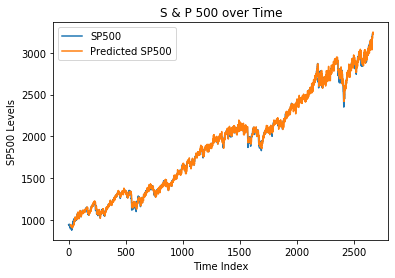

In [0]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[10+look_back:len(data), :] = np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
plt.savefig('sp500_plt5_1lay_8h.png')

Text(0.5, 1.0, 'S & P 500 over Time')

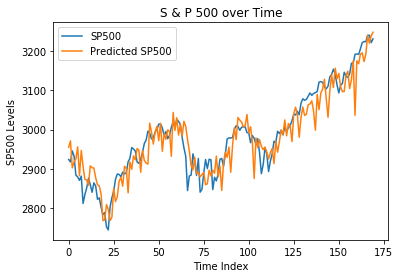

In [0]:
testPredictPlot = np.empty_like(data[len(data)-170:])
testPredictPlot[:, :] = np.reshape(pred,(-1,1))[len(pred)-170:]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data[len(data)-170:]), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")